








































































































































































































































































































































































# Configuración de notebook

In [2]:
#Importamos todas las librerias a usar
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import seaborn as sns

In [3]:
# Permite que los gráficos generados por la biblioteca matplotlib se muestren directamente en el notebook
%matplotlib inline

# Configura las imágenes para que tengan una alta resolución
%config InlineBackend.figure_format = "retina"

In [4]:
# Ruta del archivo CSV con los datos de canciones populares en Spotify
archivo_canciones_spotify = 'universal_top_spotify_songs.csv'

# Gráfico 1: Linechart

In [5]:
# Generamos el dataframe para el gráfico
datos_canciones = pd.read_csv(archivo_canciones_spotify)
datos_canciones.head()

spotify_id                  name            artists  \
0  5N3hjp1WNayUPZrA8kJmJP  Please Please Please  Sabrina Carpenter   
1  2qSkIjg1o9h3YT9RAgYN75              Espresso  Sabrina Carpenter   
2  6dOtVTDdiauQNBQEDOtlAB    BIRDS OF A FEATHER      Billie Eilish   
3  5AJ9hqTS2wcFQCELCFRO7A   MILLION DOLLAR BABY      Tommy Richman   
4  2HYFX63wP3otVIvopRS99Z               Houdini             Eminem   

   daily_rank  daily_movement  weekly_movement country snapshot_date  \
0           1               1               49     NaN    2024-06-12   
1           2              -1               -1     NaN    2024-06-12   
2           3               0                0     NaN    2024-06-12   
3           4               0                0     NaN    2024-06-12   
4           5               0               -3     NaN    2024-06-12   

   popularity  is_explicit  ...  key loudness mode  speechiness  acousticness  \
0          83         True  ...    9   -6.073    1       0.0540        0.2740   
1          95         True  ...    0   -5.478    1       0.0285        0.1070   
2          92        False  ...    2  -10.171    1       0.0358        0.2000   
3          79        False  ...    1   -5.520    0       0.0439        0.0973   
4          88         True  ...    9   -2.760    0       0.0683        0.0292   

   instrumentalness  liveness  valence    tempo  time_signature  
0          0.000000    0.1040    0.579  107.071               4  
1          0.000065    0.1850    0.690  103.969               4  
2          0.060800    0.1170    0.438  104.978               4  
3          0.000370    0.0678    0.919  138.029               4  
4          0.000002    0.0582    0.889  127.003               4  

[5 rows x 25 columns]

In [6]:
# Dataframe con los nombres de los países
archivo_paises_ISO = "NP.csv"
datos_paises_ISO = pd.read_csv(archivo_paises_ISO, sep=";")
datos_paises_ISO.head()

Código ISO                  País       Continente
0         AE  United Arab Emirates             Asia
1         BG              Bulgaria           Europa
2         AR             Argentina  América del Sur
3         MY              Malaysia             Asia
4         UY               Uruguay  América del Sur

In [7]:
# Adaptación del dataframe de canciones
datos_canciones["country"] = datos_canciones["country"].fillna("global")
datos_canciones["month"] = pd.DatetimeIndex(datos_canciones["snapshot_date"]).month
datos_canciones["year"] = pd.DatetimeIndex(datos_canciones["snapshot_date"]).year
datos_canciones["month-year"] = pd.to_datetime(datos_canciones['year'].astype(str) + '-' + datos_canciones['month'].astype(str))
datos_canciones.head()

spotify_id                  name            artists  \
0  5N3hjp1WNayUPZrA8kJmJP  Please Please Please  Sabrina Carpenter   
1  2qSkIjg1o9h3YT9RAgYN75              Espresso  Sabrina Carpenter   
2  6dOtVTDdiauQNBQEDOtlAB    BIRDS OF A FEATHER      Billie Eilish   
3  5AJ9hqTS2wcFQCELCFRO7A   MILLION DOLLAR BABY      Tommy Richman   
4  2HYFX63wP3otVIvopRS99Z               Houdini             Eminem   

   daily_rank  daily_movement  weekly_movement country snapshot_date  \
0           1               1               49  global    2024-06-12   
1           2              -1               -1  global    2024-06-12   
2           3               0                0  global    2024-06-12   
3           4               0                0  global    2024-06-12   
4           5               0               -3  global    2024-06-12   

   popularity  is_explicit  ...  speechiness acousticness instrumentalness  \
0          83         True  ...       0.0540       0.2740         0.000000   
1          95         True  ...       0.0285       0.1070         0.000065   
2          92        False  ...       0.0358       0.2000         0.060800   
3          79        False  ...       0.0439       0.0973         0.000370   
4          88         True  ...       0.0683       0.0292         0.000002   

   liveness  valence    tempo  time_signature  month  year  month-year  
0    0.1040    0.579  107.071               4      6  2024  2024-06-01  
1    0.1850    0.690  103.969               4      6  2024  2024-06-01  
2    0.1170    0.438  104.978               4      6  2024  2024-06-01  
3    0.0678    0.919  138.029               4      6  2024  2024-06-01  
4    0.0582    0.889  127.003               4      6  2024  2024-06-01  

[5 rows x 28 columns]

In [43]:
# Incluimos los nombres de los países y el continente al que pertenecen
datos_paises_ISO.rename(columns={"Código ISO": "country", "País": "country_name", "Continente": "continent"}, inplace=True)
datos_completos = pd.merge(datos_canciones, datos_paises_ISO, on="country", how="left")
datos = datos_completos[datos_completos["country"] != "global"]
datos.head()

spotify_id                                               name  \
50  1G3NTy7WKbEznyJlTQXWMX  Kabza Chant (feat. Young Stunna, Nkosazana Dau...   
51  5AJ9hqTS2wcFQCELCFRO7A                                MILLION DOLLAR BABY   
52  5DqA8IUhk1DQSGmf6XOVrI        Wadibusa (feat. OHP Sage, Pcee, & Djy Biza)   
53  6AI3ezQ4o3HUoP6Dhudph3                                        Not Like Us   
54  6Kijtp0DB6VwcoJIw7PJ9W  Imithandazo (feat. Young Stunna, DJ Maphorisa,...   

                                              artists  daily_rank  \
50  Kabza De Small, Young Stunna, Nkosazana Daught...           1   
51                                      Tommy Richman           2   
52  Uncle Waffles, Royal MusiQ, Ohp Sage, Pcee, Dj...           3   
53                                     Kendrick Lamar           4   
54  Kabza De Small, Mthunzi, DJ Maphorisa, Young S...           5   

    daily_movement  weekly_movement country snapshot_date  popularity  \
50               0               49      ZA    2024-06-12          53   
51               0                0      ZA    2024-06-12          79   
52               0                1      ZA    2024-06-12          63   
53               0               -3      ZA    2024-06-12          92   
54               3                2      ZA    2024-06-12          61   

    is_explicit  ...  mode speechiness acousticness  instrumentalness  \
50        False  ...     0      0.1440      0.13100          0.000009   
51        False  ...     0      0.0439      0.09730          0.000370   
52        False  ...     1      0.0477      0.00141          0.059500   
53         True  ...     1      0.0776      0.01070          0.000000   
54        False  ...     0      0.1120      0.17900          0.001260   

    liveness  valence    tempo  time_signature  country_name  continent  
50    0.0701    0.635  172.140               3  South Africa     África  
51    0.0678    0.919  138.029               4  South Africa     África  
52    0.0661    0.400  111.978               4  South Africa     África  
53    0.1410    0.214  101.061               4  South Africa     África  
54    0.1820    0.795  113.001               4  South Africa     África  

[5 rows x 27 columns]

C:\Users\dcuero\AppData\Local\Temp\ipykernel_21904\499557470.py:3: FutureWarning: The provided callable <function mean at 0x00000262BF631E40> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  tabla_danceabilidad = pd.pivot_table(data=datos_completos, index="month-year", columns="continent", values="danceability", aggfunc=np.mean)


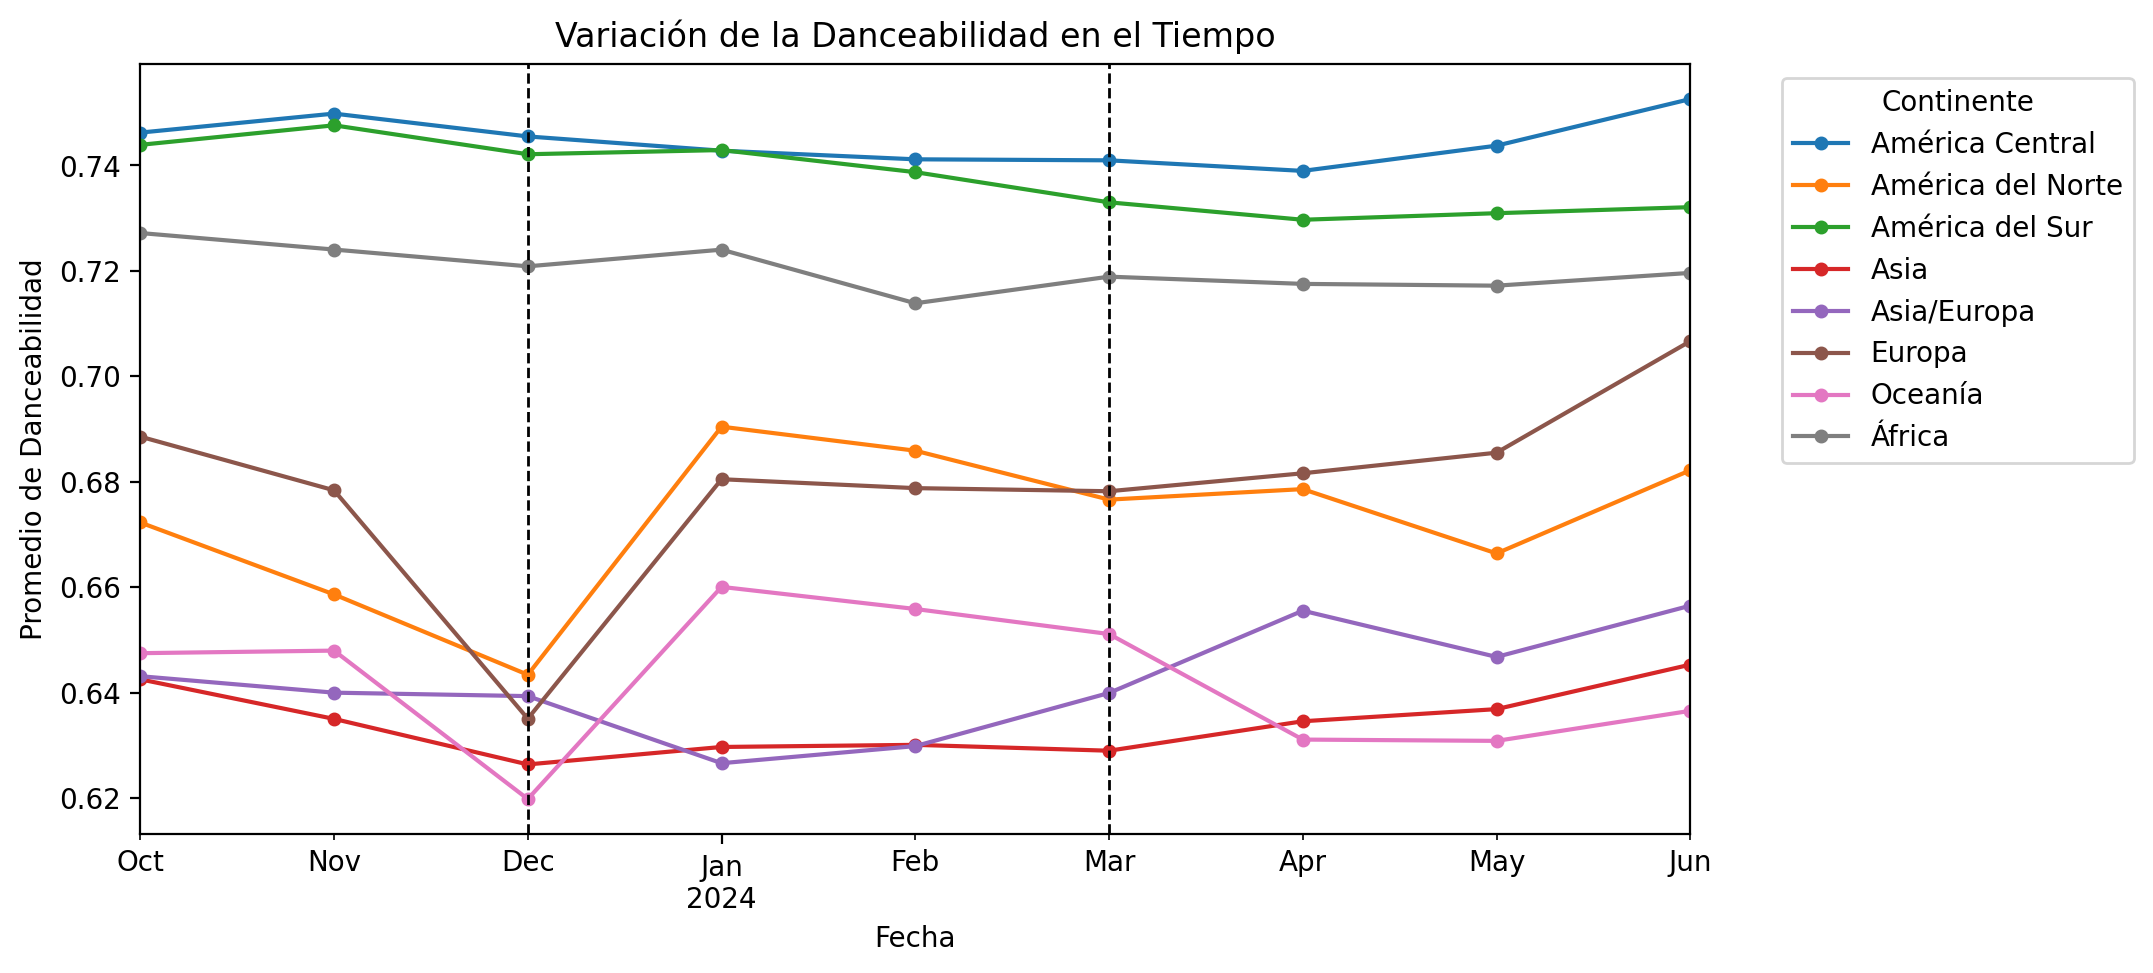

In [9]:
# Gráfico de líneas por continente (danceabilidad)
# Datos de interés agrupados
tabla_danceabilidad = pd.pivot_table(data=datos_completos, index="month-year", columns="continent", values="danceability", aggfunc=np.mean)

fig, ax = plt.subplots(figsize=(10, 5))

# Generación del gráfico
tabla_danceabilidad.plot(ax=ax,
                         linewidth=1.5,  # Grosor de las líneas
                         linestyle='-',  # Estilo de línea
                         marker='o',  # Marcador en los puntos de datos
                         markersize=4)  # Tamaño del marcador

# Adecuación de etiquetas y título
ax.set_title('Variación de la Danceabilidad en el Tiempo')
ax.set_xlabel('Fecha')
ax.set_ylabel('Promedio de Danceabilidad')
ax.legend(title='Continente', bbox_to_anchor=(1.05, 1), loc='upper left')

# Añadir líneas verticales de referencia
ax.axvline(x=pd.to_datetime('2023-12-21'), color='#000000', linestyle='--', linewidth=1)
ax.axvline(x=pd.to_datetime('2024-03-20'), color='#000000', linestyle='--', linewidth=1)

plt.show()


C:\Users\dcuero\AppData\Local\Temp\ipykernel_21904\1347815447.py:3: FutureWarning: The provided callable <function mean at 0x00000262BF631E40> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  tabla_energia = pd.pivot_table(data=datos_completos, index="month-year", columns="continent", values="energy", aggfunc=np.mean)


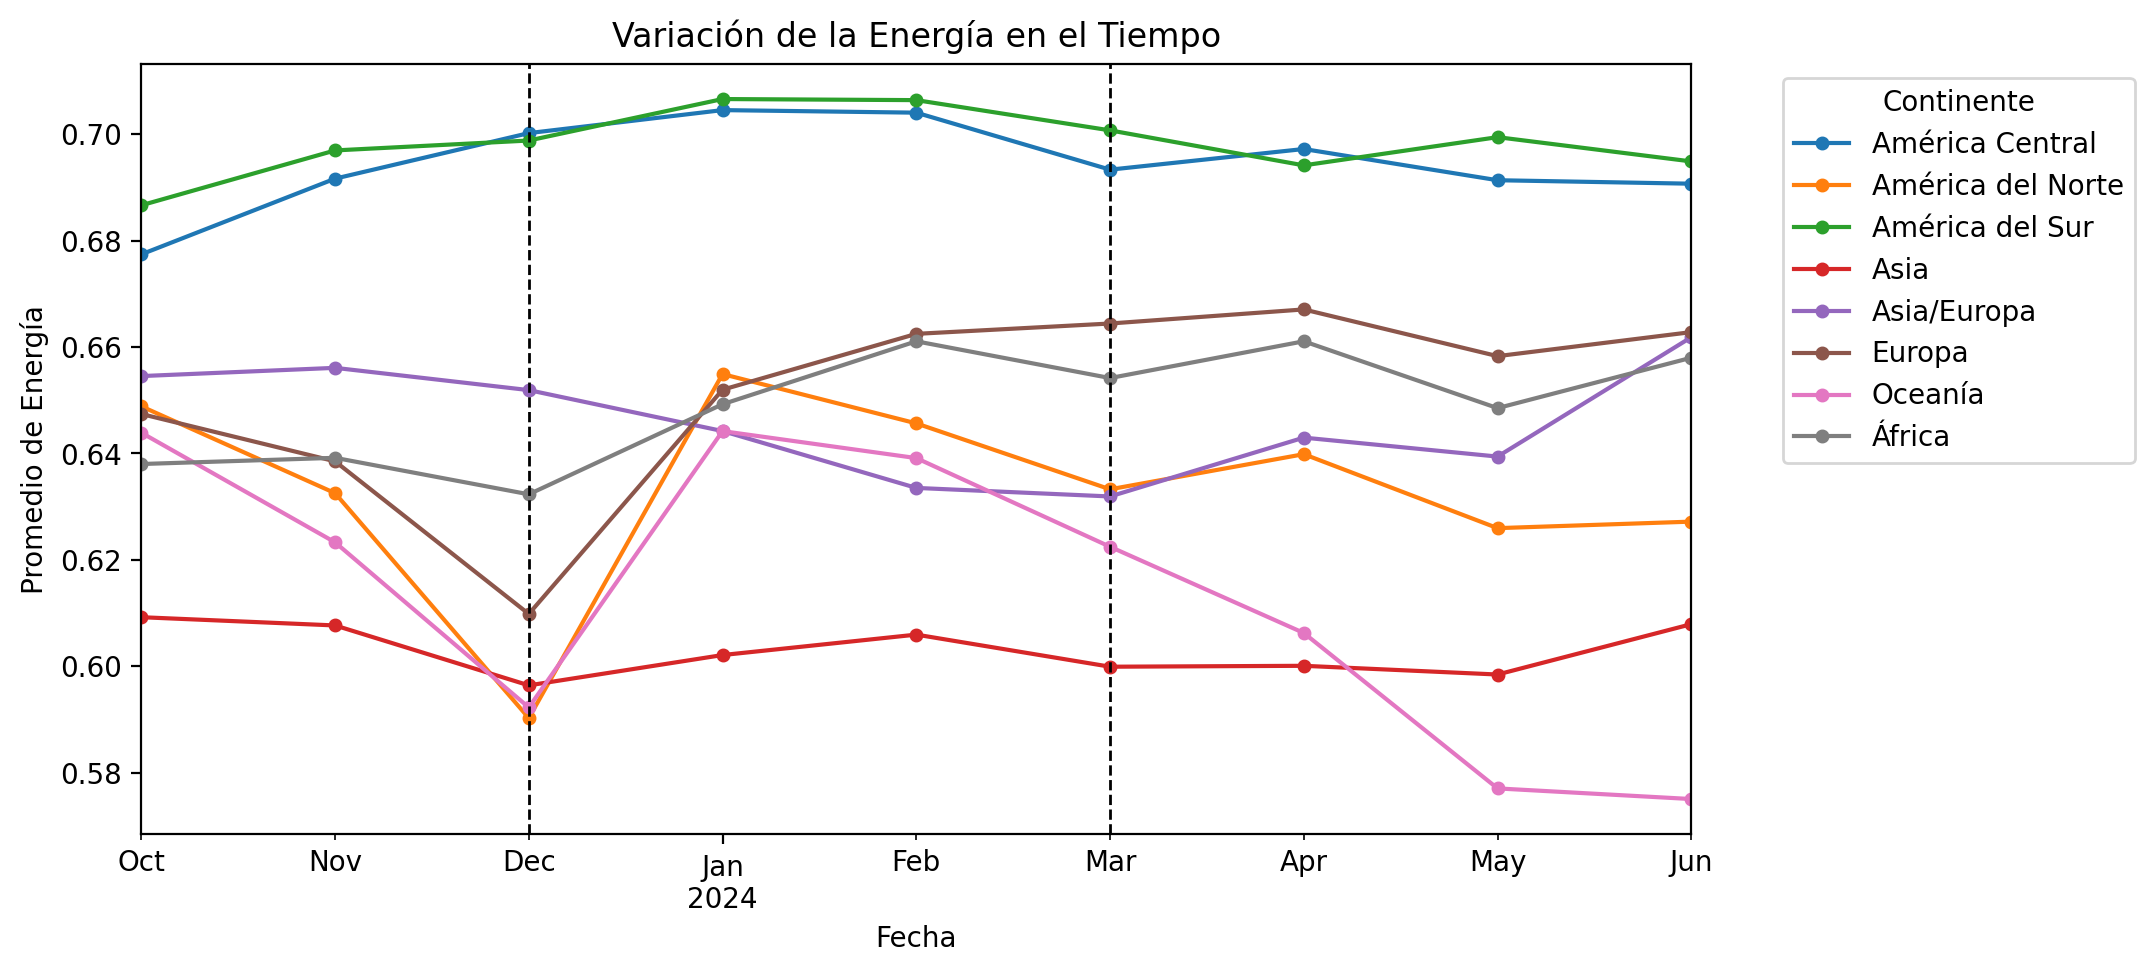

In [10]:
# Gráfico de líneas por continente (energía)
# Datos de interés agrupados
tabla_energia = pd.pivot_table(data=datos_completos, index="month-year", columns="continent", values="energy", aggfunc=np.mean)

fig, ax = plt.subplots(figsize=(10, 5))

# Generación del gráfico
tabla_energia.plot(ax=ax,
                   linewidth=1.5,
                   linestyle='-',
                   marker='o',
                   markersize=4)

# Adecuación de etiquetas y título
ax.set_title('Variación de la Energía en el Tiempo')
ax.set_xlabel('Fecha')
ax.set_ylabel('Promedio de Energía')
ax.legend(title='Continente', bbox_to_anchor=(1.05, 1), loc='upper left')

# Añadir líneas verticales de referencia
ax.axvline(x=pd.to_datetime('2023-12-21'), color='#000000', linestyle='--', linewidth=1)
ax.axvline(x=pd.to_datetime('2024-03-20'), color='#000000', linestyle='--', linewidth=1)

plt.show()

C:\Users\dcuero\AppData\Local\Temp\ipykernel_21904\2005221529.py:3: FutureWarning: The provided callable <function mean at 0x00000262BF631E40> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  tabla_positividad = pd.pivot_table(data=datos_completos, index="month-year", columns="continent", values="valence", aggfunc=np.mean)


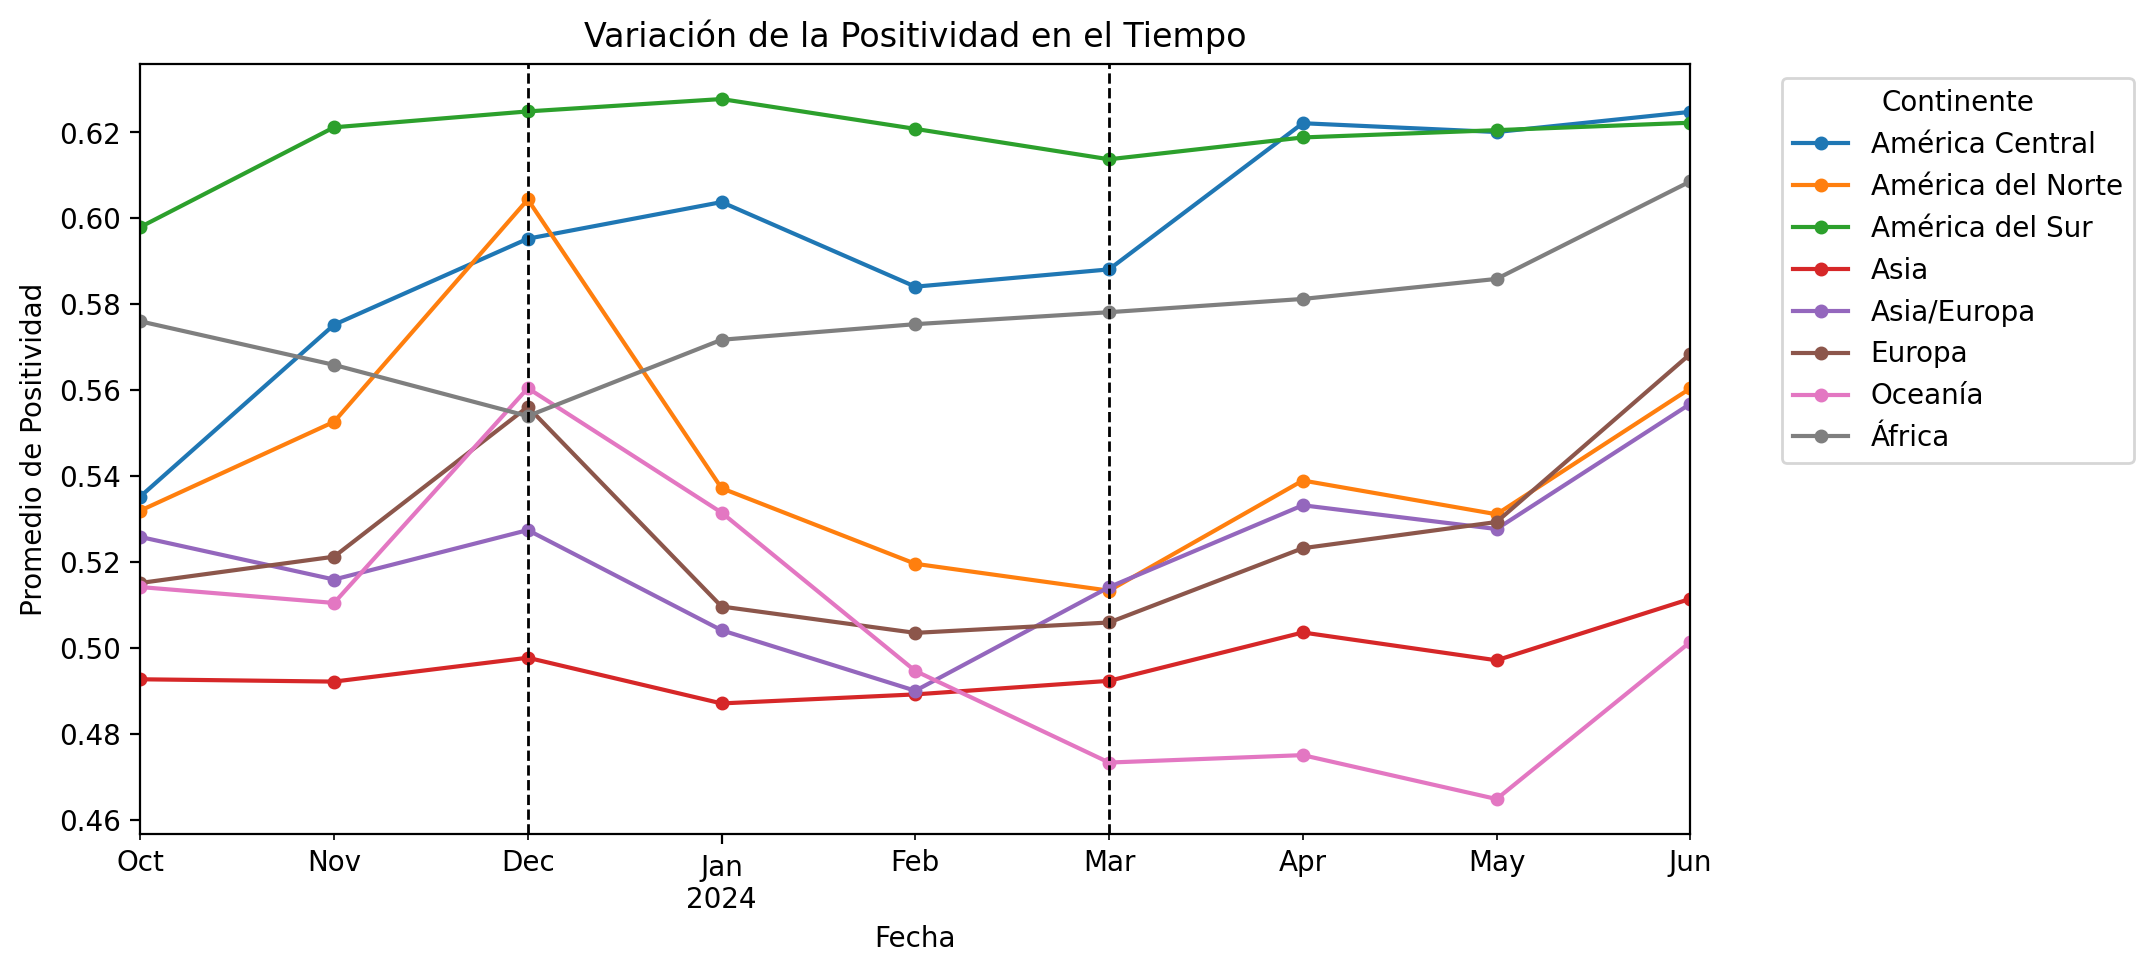

In [11]:
# Gráfico de líneas por continente (positividad)
# Datos de interés agrupados
tabla_positividad = pd.pivot_table(data=datos_completos, index="month-year", columns="continent", values="valence", aggfunc=np.mean)

fig, ax = plt.subplots(figsize=(10, 5))

# Generación del gráfico
tabla_positividad.plot(ax=ax,
                       linewidth=1.5,
                       linestyle='-',
                       marker='o',
                       markersize=4)

# Adecuación de etiquetas y título
ax.set_title('Variación de la Positividad en el Tiempo')
ax.set_xlabel('Fecha')
ax.set_ylabel('Promedio de Positividad')
ax.legend(title='Continente', bbox_to_anchor=(1.05, 1), loc='upper left')

# Añadir líneas verticales de referencia
ax.axvline(x=pd.to_datetime('2023-12-21'), color='#000000', linestyle='--', linewidth=1)
ax.axvline(x=pd.to_datetime('2024-03-20'), color='#000000', linestyle='--', linewidth=1)

plt.show()

# Gráfico 2: Barchart

In [12]:
# Generamos el dataframe inicial
datos_canciones = pd.read_csv(archivo_canciones_spotify)
datos_canciones.head()

spotify_id                  name            artists  \
0  5N3hjp1WNayUPZrA8kJmJP  Please Please Please  Sabrina Carpenter   
1  2qSkIjg1o9h3YT9RAgYN75              Espresso  Sabrina Carpenter   
2  6dOtVTDdiauQNBQEDOtlAB    BIRDS OF A FEATHER      Billie Eilish   
3  5AJ9hqTS2wcFQCELCFRO7A   MILLION DOLLAR BABY      Tommy Richman   
4  2HYFX63wP3otVIvopRS99Z               Houdini             Eminem   

   daily_rank  daily_movement  weekly_movement country snapshot_date  \
0           1               1               49     NaN    2024-06-12   
1           2              -1               -1     NaN    2024-06-12   
2           3               0                0     NaN    2024-06-12   
3           4               0                0     NaN    2024-06-12   
4           5               0               -3     NaN    2024-06-12   

   popularity  is_explicit  ...  key loudness mode  speechiness  acousticness  \
0          83         True  ...    9   -6.073    1       0.0540        0.2740   
1          95         True  ...    0   -5.478    1       0.0285        0.1070   
2          92        False  ...    2  -10.171    1       0.0358        0.2000   
3          79        False  ...    1   -5.520    0       0.0439        0.0973   
4          88         True  ...    9   -2.760    0       0.0683        0.0292   

   instrumentalness  liveness  valence    tempo  time_signature  
0          0.000000    0.1040    0.579  107.071               4  
1          0.000065    0.1850    0.690  103.969               4  
2          0.060800    0.1170    0.438  104.978               4  
3          0.000370    0.0678    0.919  138.029               4  
4          0.000002    0.0582    0.889  127.003               4  

[5 rows x 25 columns]

In [34]:
# Filtramos las canciones que entraron en el top 1 de todos los países
datos_canciones["country"] = datos_canciones["country"].fillna("global")
top1_canciones_global = datos_canciones[(datos_canciones["country"] != "global") & (datos_canciones["daily_rank"] == 1)]
top1_canciones_global = top1_canciones_global[["spotify_id", "name", "snapshot_date", "country", "danceability", "energy", "mode", "tempo", "key"]]
#top1_canciones_global.replace({"mode": {1: "Mayor", 0: "Menor"}})
top1_canciones_global["mode"] = np.where(top1_canciones_global["mode"], "Mayor", "Menor")
top1_canciones_global

spotify_id  \
50      1G3NTy7WKbEznyJlTQXWMX   
100     31VNCmwspR7nVJ6kruUuJt   
150     6a9Z1jUms915w4O7N1PxjY   
200     1pymWRCuZfCd0zdiBJo0Hj   
250     5N3hjp1WNayUPZrA8kJmJP   
...                        ...   
858053  2HafqoJbgXdtjwCOvNEF14   
858103  56y1jOTK0XSvJzVv9vHQBK   
858153  2HafqoJbgXdtjwCOvNEF14   
858203  4SW9gHnW8NfKOdqmh0ij45   
858253  3rUGC1vUpkDG9CZFHMur1t   

                                                     name snapshot_date  \
50      Kabza Chant (feat. Young Stunna, Nkosazana Dau...    2024-06-12   
100                             Đừng Làm Trái Tim Anh Đau    2024-06-12   
150                                                 Santa    2024-06-12   
200                                     REAL GANGSTA LOVE    2024-06-12   
250                                  Please Please Please    2024-06-12   
...                                                   ...           ...   
858053                                        Si No Estás    2023-10-18   
858103                                 Paint The Town Red    2023-10-18   
858153                                        Si No Estás    2023-10-18   
858203                                              Fruto    2023-10-18   
858253                                             greedy    2023-10-18   

       country  danceability  energy   mode    tempo  key  
50          ZA         0.642   0.471  Menor  172.140    5  
100         VN         0.854   0.636  Mayor  125.512   11  
150         VE         0.725   0.709  Menor   99.993    3  
200         UY         0.831   0.643  Menor   97.013    4  
250         US         0.669   0.586  Mayor  107.071    9  
...        ...           ...     ...    ...      ...  ...  
858053      BE         0.537   0.421  Mayor   98.224    5  
858103      AU         0.864   0.556  Menor   99.974    2  
858153      AT         0.537   0.421  Mayor   98.224    5  
858203      AR         0.801   0.517  Menor  160.254    2  
858253      AE         0.750   0.733  Menor  111.018    6  

[16971 rows x 9 columns]

In [35]:
# Creamos atributos de día, mes y año a partir del atributo snapshot_date
top1_canciones_global['month'] = pd.DatetimeIndex(top1_canciones_global['snapshot_date']).month
top1_canciones_global['year'] = pd.DatetimeIndex(top1_canciones_global['snapshot_date']).year
top1_canciones_global['day'] = pd.DatetimeIndex(top1_canciones_global['snapshot_date']).day
top1_canciones_global.head()

spotify_id  \
50   1G3NTy7WKbEznyJlTQXWMX   
100  31VNCmwspR7nVJ6kruUuJt   
150  6a9Z1jUms915w4O7N1PxjY   
200  1pymWRCuZfCd0zdiBJo0Hj   
250  5N3hjp1WNayUPZrA8kJmJP   

                                                  name snapshot_date country  \
50   Kabza Chant (feat. Young Stunna, Nkosazana Dau...    2024-06-12      ZA   
100                          Đừng Làm Trái Tim Anh Đau    2024-06-12      VN   
150                                              Santa    2024-06-12      VE   
200                                  REAL GANGSTA LOVE    2024-06-12      UY   
250                               Please Please Please    2024-06-12      US   

     danceability  energy   mode    tempo  key  month  year  day  
50          0.642   0.471  Menor  172.140    5      6  2024   12  
100         0.854   0.636  Mayor  125.512   11      6  2024   12  
150         0.725   0.709  Menor   99.993    3      6  2024   12  
200         0.831   0.643  Menor   97.013    4      6  2024   12  
250         0.669   0.586  Mayor  107.071    9      6  2024   12

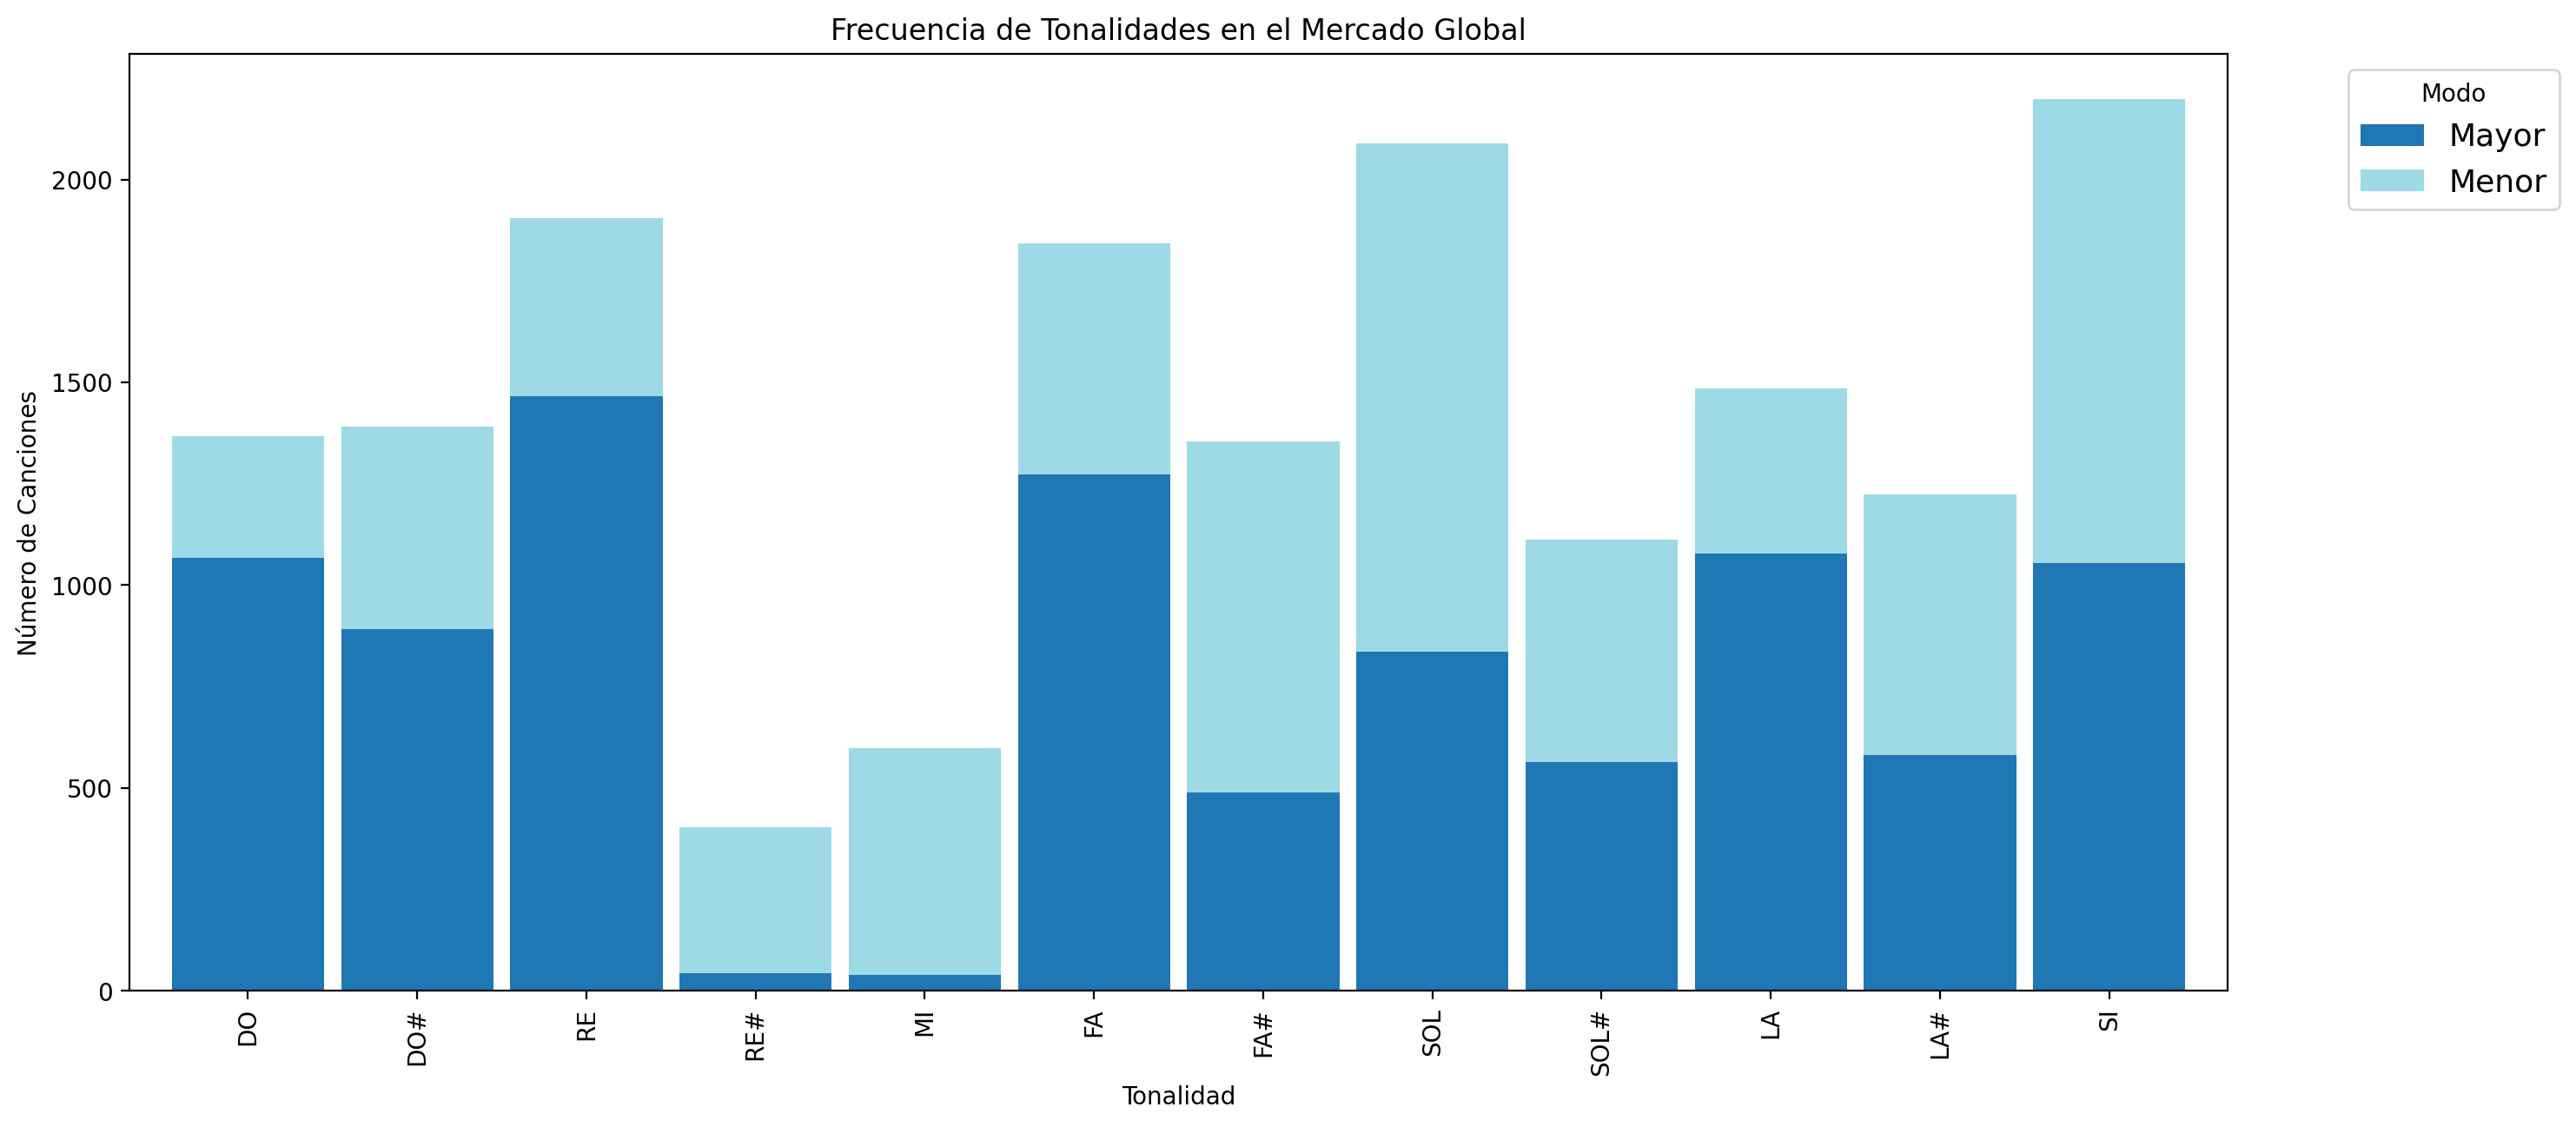

In [38]:
# Gráfico de barras apiladas: Frecuencia de tonalidades en el mercado global
# Generamos un dataframe auxiliar, agrupando por 'key' y 'mode' y contando las ocurrencias
frecuencia_tonalidades = top1_canciones_global.groupby(['key', 'mode']).size().unstack(fill_value=0)
frecuencia_tonalidades

# Gráfico de barras apiladas
fig, ax = plt.subplots(figsize=(21, 7))
frecuencia_tonalidades.plot(kind='bar', stacked=True, colormap="tab20", width=0.9, ax=ax)

# Adecuación de etiquetas y título del gráfico
ax.set_title('Frecuencia de Tonalidades en el Mercado Global')
ax.set_ylabel('Número de Canciones')
ax.set_xlabel('Tonalidad')
ax.legend(title='Modo', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=13)

# Estableciendo los nombres del eje x
labels_tonalidades = ["DO", "DO#", "RE", "RE#", "MI", "FA", "FA#", "SOL", "SOL#", "LA", "LA#", "SI"]
ax.set_xticklabels(labels_tonalidades)

plt.subplots_adjust(right=0.7)
plt.show()

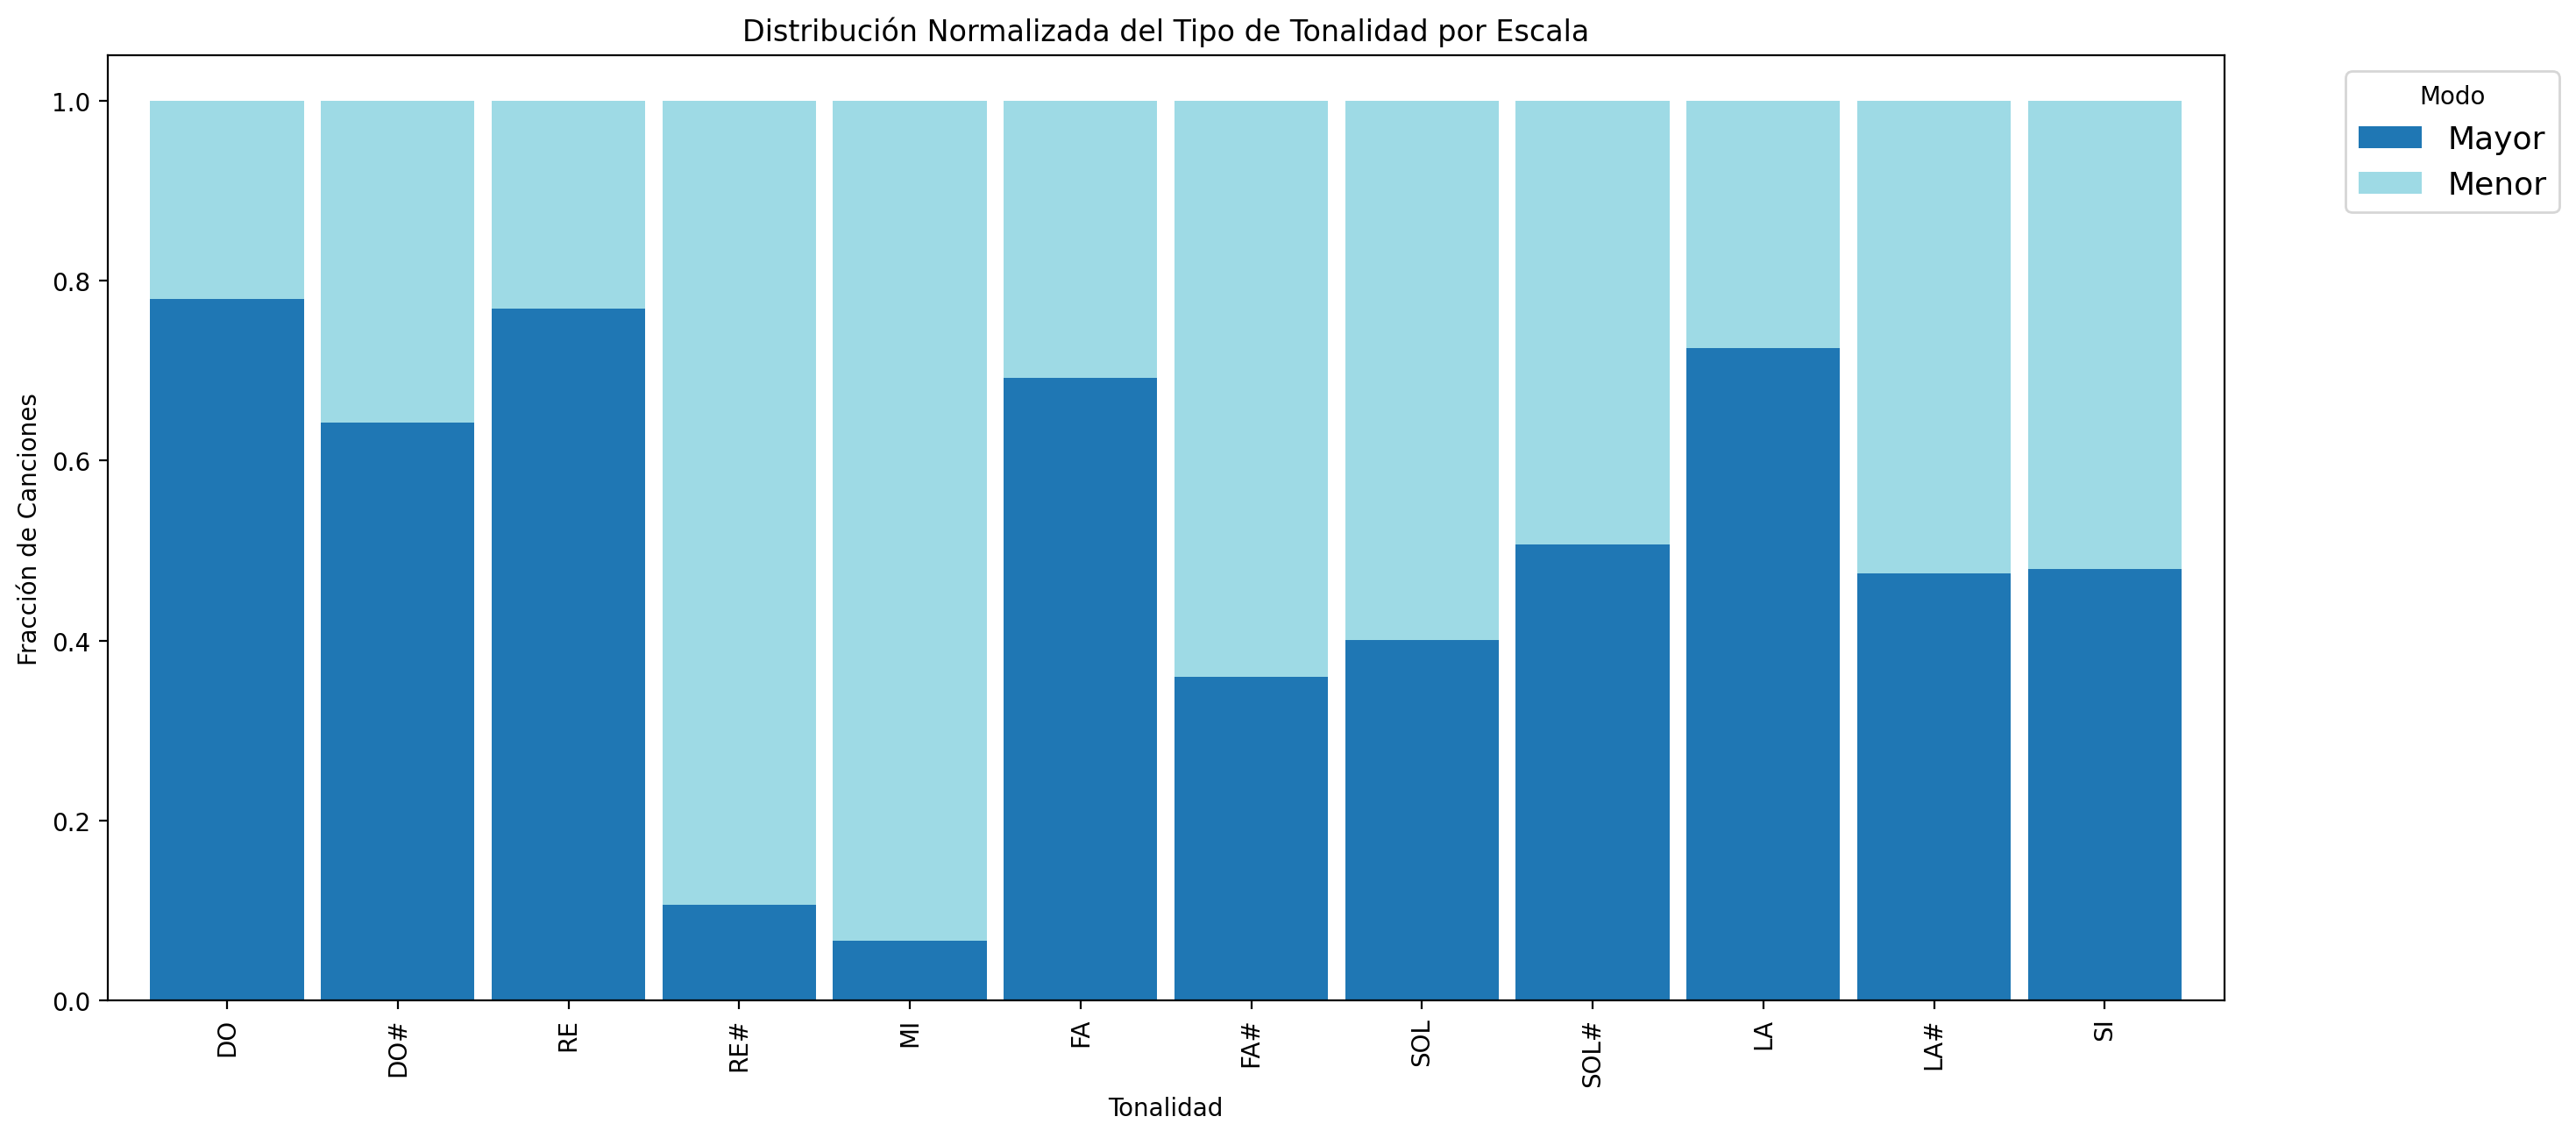

In [39]:
# Normalizamos las frecuencias para que cada fila sume 1
frecuencia_tonalidades_normalizada = frecuencia_tonalidades.div(frecuencia_tonalidades.sum(axis=1), axis=0)

# Gráfico de barras apiladas normalizado
fig, ax = plt.subplots(figsize=(21, 7))
frecuencia_tonalidades_normalizada.plot(kind='bar', stacked=True, colormap='tab20', width=0.9, ax=ax)

# Adecuación de etiquetas y título del gráfico normalizado
ax.set_title('Distribución Normalizada del Tipo de Tonalidad por Escala')
ax.set_ylabel('Fracción de Canciones')
ax.set_xlabel('Tonalidad')
ax.legend(title='Modo', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize= 13)

# Estableciendo los nombres del eje x
ax.set_xticklabels(labels_tonalidades)

plt.subplots_adjust(right=0.7)
plt.show()

# Gráfico 3: Heatmap

In [17]:
# Generamos el dataframe inicial
datos_canciones = pd.read_csv(archivo_canciones_spotify)
datos_canciones.head()

spotify_id                  name            artists  \
0  5N3hjp1WNayUPZrA8kJmJP  Please Please Please  Sabrina Carpenter   
1  2qSkIjg1o9h3YT9RAgYN75              Espresso  Sabrina Carpenter   
2  6dOtVTDdiauQNBQEDOtlAB    BIRDS OF A FEATHER      Billie Eilish   
3  5AJ9hqTS2wcFQCELCFRO7A   MILLION DOLLAR BABY      Tommy Richman   
4  2HYFX63wP3otVIvopRS99Z               Houdini             Eminem   

   daily_rank  daily_movement  weekly_movement country snapshot_date  \
0           1               1               49     NaN    2024-06-12   
1           2              -1               -1     NaN    2024-06-12   
2           3               0                0     NaN    2024-06-12   
3           4               0                0     NaN    2024-06-12   
4           5               0               -3     NaN    2024-06-12   

   popularity  is_explicit  ...  key loudness mode  speechiness  acousticness  \
0          83         True  ...    9   -6.073    1       0.0540        0.2740   
1          95         True  ...    0   -5.478    1       0.0285        0.1070   
2          92        False  ...    2  -10.171    1       0.0358        0.2000   
3          79        False  ...    1   -5.520    0       0.0439        0.0973   
4          88         True  ...    9   -2.760    0       0.0683        0.0292   

   instrumentalness  liveness  valence    tempo  time_signature  
0          0.000000    0.1040    0.579  107.071               4  
1          0.000065    0.1850    0.690  103.969               4  
2          0.060800    0.1170    0.438  104.978               4  
3          0.000370    0.0678    0.919  138.029               4  
4          0.000002    0.0582    0.889  127.003               4  

[5 rows x 25 columns]

In [18]:
# Importamos el dataframe con los nombres de los países
archivo_paises_ISO = "NP.csv"
datos_paises_ISO = pd.read_csv(archivo_paises_ISO, sep=";")
datos_paises_ISO.head()

Código ISO                  País       Continente
0         AE  United Arab Emirates             Asia
1         BG              Bulgaria           Europa
2         AR             Argentina  América del Sur
3         MY              Malaysia             Asia
4         UY               Uruguay  América del Sur

In [19]:
# Filtramos los datos necesarios para el gráfico de mapa geográfico
datos_explicitos = datos_canciones[['country', 'is_explicit']]
datos_explicitos.head()

country  is_explicit
0     NaN         True
1     NaN         True
2     NaN        False
3     NaN        False
4     NaN         True

In [20]:
# Renombramos las columnas del dataframe de países
datos_paises_ISO.rename(columns={"Código ISO": "country", "País": "country_name", "Continente": "continent"}, inplace=True)
datos_paises_ISO.head()

country          country_name        continent
0      AE  United Arab Emirates             Asia
1      BG              Bulgaria           Europa
2      AR             Argentina  América del Sur
3      MY              Malaysia             Asia
4      UY               Uruguay  América del Sur

In [21]:
# Calculamos el porcentaje de canciones explícitas por país
porcentaje_explicito_por_pais = datos_explicitos.groupby('country').mean().reset_index()
porcentaje_explicito_por_pais.rename(columns={"is_explicit": "porcentaje_explicito"}, inplace=True)
porcentaje_explicito_por_pais['porcentaje_explicito'] *= 100  # Convertimos a porcentaje


In [22]:
# Unimos los datos con los nombres de los países y continentes
datos_por_pais = pd.merge(porcentaje_explicito_por_pais, datos_paises_ISO, on="country", how="left")
datos_por_pais.head()

country  porcentaje_explicito          country_name        continent
0      AE             41.466367  United Arab Emirates             Asia
1      AR             30.400675             Argentina  América del Sur
2      AT             31.596008               Austria           Europa
3      AU             35.996571             Australia          Oceanía
4      BE             26.464135               Belgium           Europa

In [23]:
# Datos del gráfico
datos_grafico = {
    "País": datos_por_pais['country_name'],
    "Porcentaje": datos_por_pais['porcentaje_explicito']  # Valores para el heatmap
}

In [24]:
# Crear el mapa de calor global
fig_mapa_global = px.choropleth(
    datos_grafico,  # Datos
    locations="País",  # Columna con nombres de países
    locationmode="country names",  # Modo de ubicación
    color="Porcentaje",  # Columna con valores para el color
    color_continuous_scale="magma_r",  # Escala de colores
    title="Porcentaje de Canciones Explícitas en el Top por País",  # Título del gráfico
    labels={'Porcentaje': 'Porcentaje (%)'},  # Etiqueta de la barra de color
)

# Ajustar el tamaño y el diseño del gráfico global
fig_mapa_global.update_layout(
    title={
        'text': "Porcentaje de Canciones Explícitas en el Top por País",  # Título detallado
        'y': 0.9,  # Posición del título en el eje y
        'x': 0.5,  # Posición del título en el eje x
        'xanchor': 'center',  # Anclaje del título en el eje x
        'yanchor': 'top'  # Anclaje del título en el eje y
    },
    width=1000,  # Ancho del gráfico en píxeles
    height=600,  # Alto del gráfico en píxeles
    coloraxis_colorbar={
        'title': "Porcentaje (%)",  # Título de la barra de color más corto
        'orientation': 'h',  # Orientación horizontal
        'xanchor': 'center',  # Anclaje en el centro
        'yanchor': 'top',  # Anclaje en la parte superior
        'x': 0.5,  # Posición en el eje x
        'y': 0,  # Posición en el eje y
        'ticks': "outside",  # Posición de las marcas de la barra de color
        'tickvals': [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100],  # Valores de las marcas de la barra de color
        'ticktext': ['0%', '10%', '20%', '30%', '40%', '50%', '60%', '70%', '80%', '90%', '100%'],  # Texto de las marcas de la barra de color
    }
)
# Mostrar el gráfico global
fig_mapa_global.show()

In [25]:
# Crear el mapa de calor para América del Sur
fig_mapa_sudamerica = px.choropleth(
    datos_grafico,  # Datos
    locations="País",  # Columna con nombres de países
    locationmode="country names",  # Modo de ubicación
    color="Porcentaje",  # Columna con valores para el color
    color_continuous_scale="magma_r",  # Escala de colores
    title="Porcentaje de Canciones Explícitas en el Top por País de América del Sur",
    scope="south america",
    labels={'Porcentaje': 'Porcentaje (%)'},  # Etiqueta de la barra de color
)

# Ajustar el tamaño y el diseño del gráfico de América del Sur
fig_mapa_sudamerica.update_layout(
    title={
        'text': "Porcentaje de Canciones Explícitas en el Top por País de América del Sur",  # Título detallado
        'y': 0.9,  # Posición del título en el eje y
        'x': 0.5,  # Posición del título en el eje x
        'xanchor': 'center',  # Anclaje del título en el eje x
        'yanchor': 'top'  # Anclaje del título en el eje y
    },
    width=1000,  # Ancho del gráfico en píxeles
    height=600,  # Alto del gráfico en píxeles
    coloraxis_colorbar={
        'title': "Porcentaje (%)",  # Título de la barra de color más corto
        'orientation': 'h',  # Orientación horizontal
        'xanchor': 'center',  # Anclaje en el centro
        'yanchor': 'top',  # Anclaje en la parte superior
        'x': 0.5,  # Posición en el eje x
        'y': 0,  # Posición en el eje y
        'ticks': "outside",  # Posición de las marcas de la barra de color
        'tickvals': [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100],  # Valores de las marcas de la barra de color
        'ticktext': ['0%', '10%', '20%', '30%', '40%', '50%', '60%', '70%', '80%', '90%', '100%'],  # Texto de las marcas de la barra de color
    }
)
# Mostrar el gráfico de América del Sur
fig_mapa_sudamerica.show()

# Gráfico 4: Clustermap

In [26]:
# Importamos los datos iniciales
datos_canciones = pd.read_csv(archivo_canciones_spotify)
datos_paises_ISO = pd.read_csv("NP.csv", sep=";")
datos_canciones["country"] = datos_canciones["country"].fillna("global")
datos_canciones.head()

spotify_id                  name            artists  \
0  5N3hjp1WNayUPZrA8kJmJP  Please Please Please  Sabrina Carpenter   
1  2qSkIjg1o9h3YT9RAgYN75              Espresso  Sabrina Carpenter   
2  6dOtVTDdiauQNBQEDOtlAB    BIRDS OF A FEATHER      Billie Eilish   
3  5AJ9hqTS2wcFQCELCFRO7A   MILLION DOLLAR BABY      Tommy Richman   
4  2HYFX63wP3otVIvopRS99Z               Houdini             Eminem   

   daily_rank  daily_movement  weekly_movement country snapshot_date  \
0           1               1               49  global    2024-06-12   
1           2              -1               -1  global    2024-06-12   
2           3               0                0  global    2024-06-12   
3           4               0                0  global    2024-06-12   
4           5               0               -3  global    2024-06-12   

   popularity  is_explicit  ...  key loudness mode  speechiness  acousticness  \
0          83         True  ...    9   -6.073    1       0.0540        0.2740   
1          95         True  ...    0   -5.478    1       0.0285        0.1070   
2          92        False  ...    2  -10.171    1       0.0358        0.2000   
3          79        False  ...    1   -5.520    0       0.0439        0.0973   
4          88         True  ...    9   -2.760    0       0.0683        0.0292   

   instrumentalness  liveness  valence    tempo  time_signature  
0          0.000000    0.1040    0.579  107.071               4  
1          0.000065    0.1850    0.690  103.969               4  
2          0.060800    0.1170    0.438  104.978               4  
3          0.000370    0.0678    0.919  138.029               4  
4          0.000002    0.0582    0.889  127.003               4  

[5 rows x 25 columns]

In [27]:
# Renombramos las columnas del dataframe de países
datos_paises_ISO.rename(columns={"Código ISO": "country", "País": "country_name", "Continente": "continent"}, inplace=True)

# Unimos los datos de las canciones con los nombres de los países y continentes
datos_completos = pd.merge(datos_canciones, datos_paises_ISO, on="country", how="left")
datos_completos.head()

spotify_id                  name            artists  \
0  5N3hjp1WNayUPZrA8kJmJP  Please Please Please  Sabrina Carpenter   
1  2qSkIjg1o9h3YT9RAgYN75              Espresso  Sabrina Carpenter   
2  6dOtVTDdiauQNBQEDOtlAB    BIRDS OF A FEATHER      Billie Eilish   
3  5AJ9hqTS2wcFQCELCFRO7A   MILLION DOLLAR BABY      Tommy Richman   
4  2HYFX63wP3otVIvopRS99Z               Houdini             Eminem   

   daily_rank  daily_movement  weekly_movement country snapshot_date  \
0           1               1               49  global    2024-06-12   
1           2              -1               -1  global    2024-06-12   
2           3               0                0  global    2024-06-12   
3           4               0                0  global    2024-06-12   
4           5               0               -3  global    2024-06-12   

   popularity  is_explicit  ...  mode speechiness acousticness  \
0          83         True  ...     1      0.0540       0.2740   
1          95         True  ...     1      0.0285       0.1070   
2          92        False  ...     1      0.0358       0.2000   
3          79        False  ...     0      0.0439       0.0973   
4          88         True  ...     0      0.0683       0.0292   

   instrumentalness  liveness  valence    tempo  time_signature  country_name  \
0          0.000000    0.1040    0.579  107.071               4           NaN   
1          0.000065    0.1850    0.690  103.969               4           NaN   
2          0.060800    0.1170    0.438  104.978               4           NaN   
3          0.000370    0.0678    0.919  138.029               4           NaN   
4          0.000002    0.0582    0.889  127.003               4           NaN   

   continent  
0        NaN  
1        NaN  
2        NaN  
3        NaN  
4        NaN  

[5 rows x 27 columns]

In [28]:
# Definimos dataframes específicos para cada continente
datos_sudamerica = datos_completos[datos_completos["continent"] == "América del Sur"]
datos_asia = datos_completos[datos_completos["continent"] == "Asia"]
datos_norteamerica = datos_completos[datos_completos["continent"] == "América del Norte"]
datos_europa = datos_completos[datos_completos["continent"] == "Europa"]
datos_africa = datos_completos[datos_completos["continent"] == "África"]
datos_centroamerica = datos_completos[datos_completos["continent"] == "América Central"]
datos_oceania = datos_completos[datos_completos["continent"] == "Oceanía"]
datos_asia_europa = datos_completos[datos_completos["continent"] == "Asia/Europa"]


In [29]:
# Generación de tabla pivote para obtener el gráfico deseado (Sudamérica)
tabla_pivote_sudamerica = pd.pivot_table(data=datos_sudamerica, index="country_name", columns="daily_rank", values="danceability", aggfunc=np.mean)
tabla_pivote_sudamerica

C:\Users\dcuero\AppData\Local\Temp\ipykernel_21904\3508781194.py:2: FutureWarning:

The provided callable <function mean at 0x00000262BF631E40> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.



daily_rank          1         2         3         4         5         6   \
country_name                                                               
Argentina     0.710315  0.726114  0.735718  0.726643  0.733483  0.725378   
Bolivia       0.772623  0.773260  0.759567  0.771331  0.713532  0.728131   
Brazil        0.686127  0.717340  0.702222  0.681606  0.689106  0.687322   
Chile         0.819263  0.819924  0.793538  0.777788  0.783292  0.779248   
Colombia      0.805159  0.801402  0.842191  0.811379  0.859733  0.842573   
Ecuador       0.810030  0.831491  0.818487  0.815619  0.828124  0.814287   
Paraguay      0.781665  0.799523  0.803579  0.751935  0.729127  0.695922   
Peru          0.805140  0.796017  0.754770  0.766911  0.771338  0.802557   
Uruguay       0.725218  0.713815  0.734146  0.718402  0.722549  0.726841   
Venezuela     0.794979  0.827863  0.800863  0.784352  0.784211  0.776667   

daily_rank          7         8         9         10  ...        41        42  \
country_name                                          ...                       
Argentina     0.722350  0.757338  0.754886  0.723710  ...  0.723473  0.738878   
Bolivia       0.752147  0.732215  0.741130  0.727700  ...  0.690127  0.675401   
Brazil        0.681315  0.678004  0.662239  0.695380  ...  0.663268  0.661966   
Chile         0.771038  0.764937  0.780678  0.784674  ...  0.765449  0.768409   
Colombia      0.847361  0.811328  0.812237  0.787085  ...  0.737009  0.731547   
Ecuador       0.805927  0.791302  0.819234  0.816312  ...  0.785052  0.770406   
Paraguay      0.726177  0.725949  0.722893  0.715410  ...  0.709818  0.705681   
Peru          0.775430  0.768397  0.793641  0.794271  ...  0.744017  0.731055   
Uruguay       0.729245  0.741099  0.748898  0.732086  ...  0.734265  0.740723   
Venezuela     0.784384  0.768677  0.786060  0.787634  ...  0.745792  0.739438   

daily_rank          43        44        45        46        47        48  \
country_name                                                               
Argentina     0.723736  0.745393  0.729485  0.725389  0.731549  0.728332   
Bolivia       0.695899  0.694201  0.693333  0.685376  0.699382  0.685224   
Brazil        0.670326  0.669878  0.661864  0.669936  0.669954  0.670450   
Chile         0.774218  0.772882  0.782438  0.772305  0.766894  0.758345   
Colombia      0.745414  0.737641  0.749095  0.730082  0.723216  0.744265   
Ecuador       0.777091  0.782203  0.775737  0.761931  0.760571  0.753104   
Paraguay      0.697579  0.709677  0.700664  0.700551  0.682853  0.688017   
Peru          0.749456  0.743416  0.733944  0.736387  0.741384  0.748188   
Uruguay       0.743759  0.747453  0.743810  0.738553  0.726871  0.736090   
Venezuela     0.739052  0.745202  0.748803  0.729694  0.727159  0.739683   

daily_rank          49        50  
country_name                      
Argentina     0.721882  0.721500  
Bolivia       0.687736  0.695435  
Brazil        0.671767  0.664573  
Chile         0.760523  0.750895  
Colombia      0.742108  0.751558  
Ecuador       0.755996  0.749530  
Paraguay      0.695190  0.688902  
Peru          0.732732  0.721457  
Uruguay       0.731953  0.733470  
Venezuela     0.732861  0.722571  

[10 rows x 50 columns]

<Figure size 1400x1400 with 0 Axes>

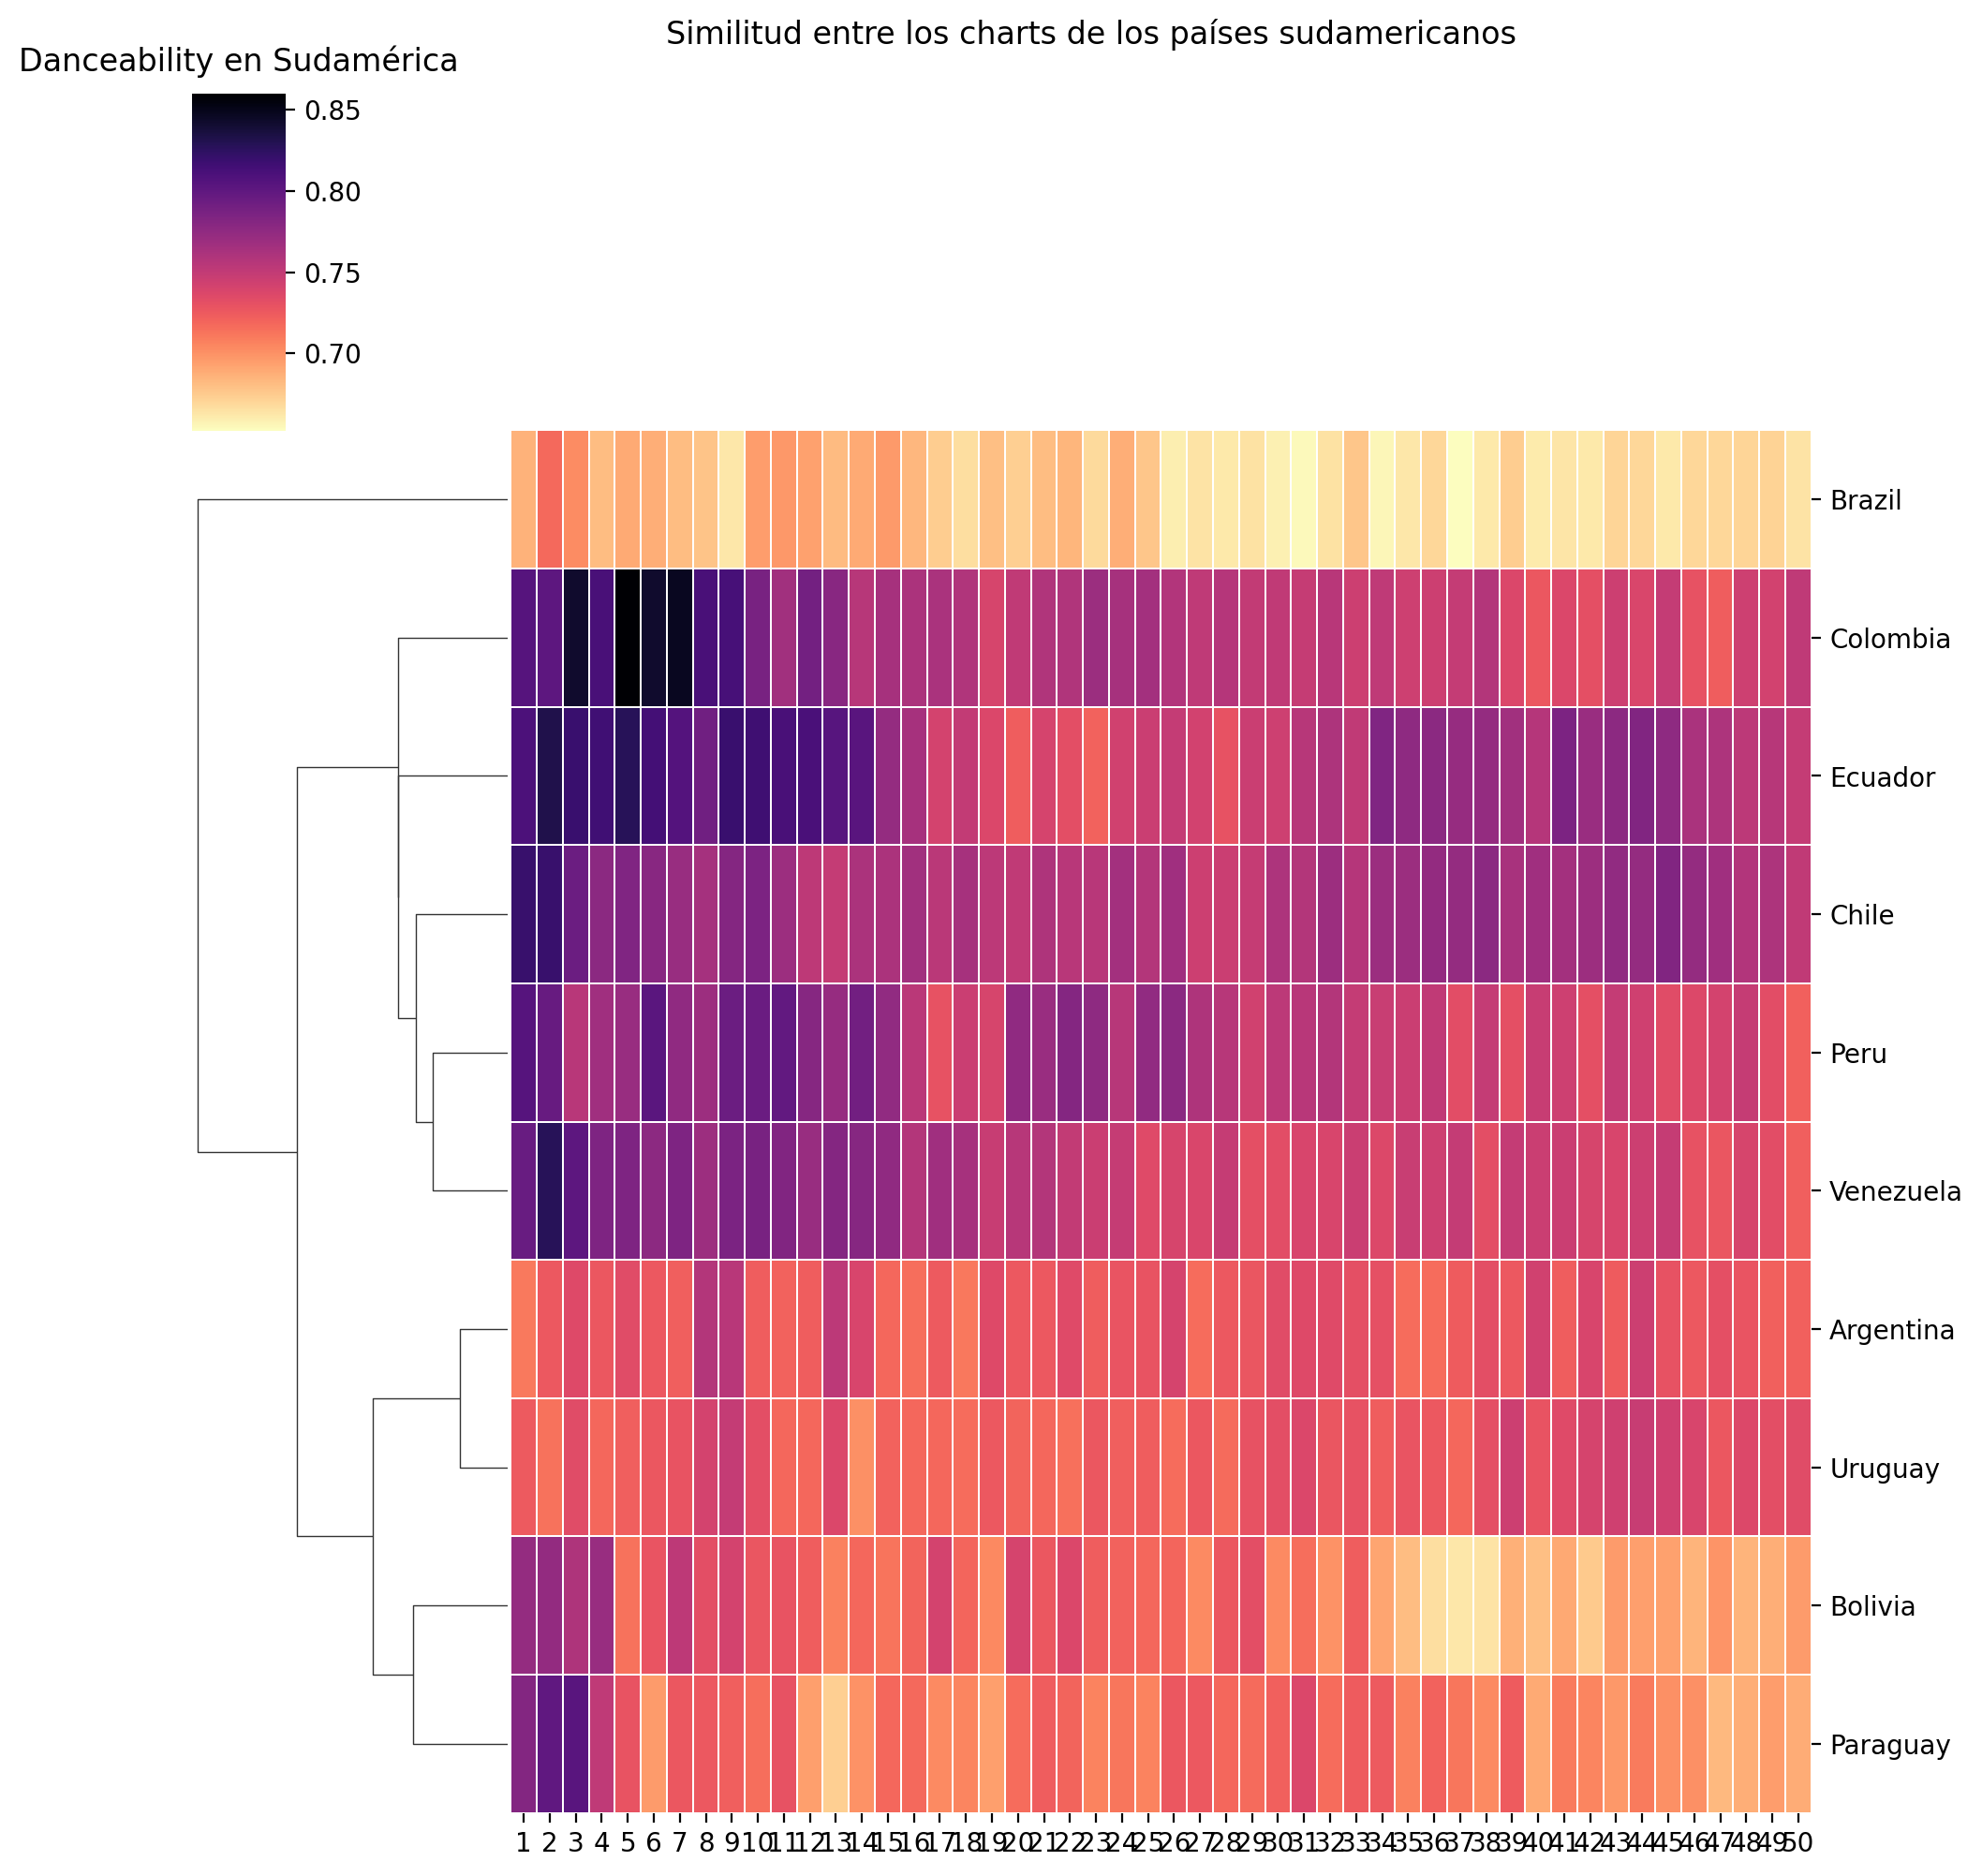

<Figure size 640x480 with 0 Axes>

In [30]:
# Generación del gráfico de calor a partir de la tabla pivote
plt.figure(figsize=(14, 14))
grafico_calor = sns.clustermap(tabla_pivote_sudamerica, cmap='magma_r', linewidth=0.1, cbar_kws=dict(shrink=0.5, pad=0.01), xticklabels=True, col_cluster=False, annot=False)
# Títulos y etiquetas
plt.title("Danceability en Sudamérica", y=1.02)
plt.suptitle("Similitud entre los charts de los países sudamericanos", y=1.02)
plt.setp(grafico_calor.ax_heatmap.get_yticklabels(), rotation=0)
plt.setp(grafico_calor.ax_heatmap.get_xticklabels(), rotation=0)
grafico_calor.ax_heatmap.set_ylabel('')
grafico_calor.ax_heatmap.set_xlabel('')

# Mostrar y guardar el gráfico
plt.show()
plt.savefig('grafico_calor_sudamerica.png', dpi=160, bbox_inches='tight')

# Gráfico 5: Áreas apiladas

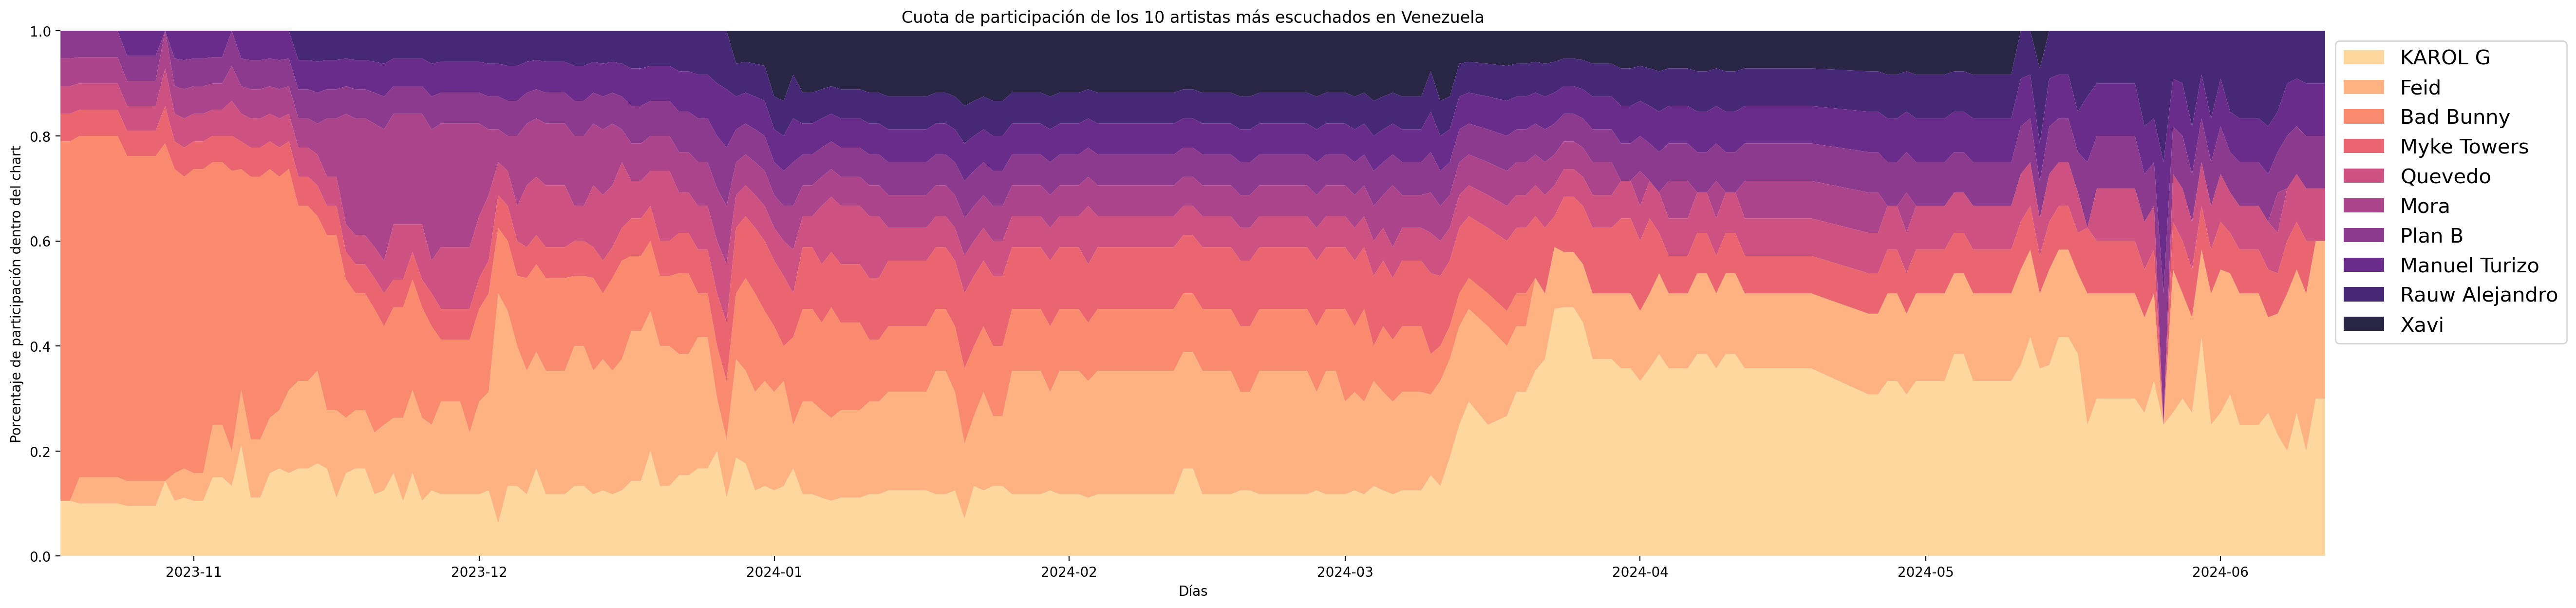

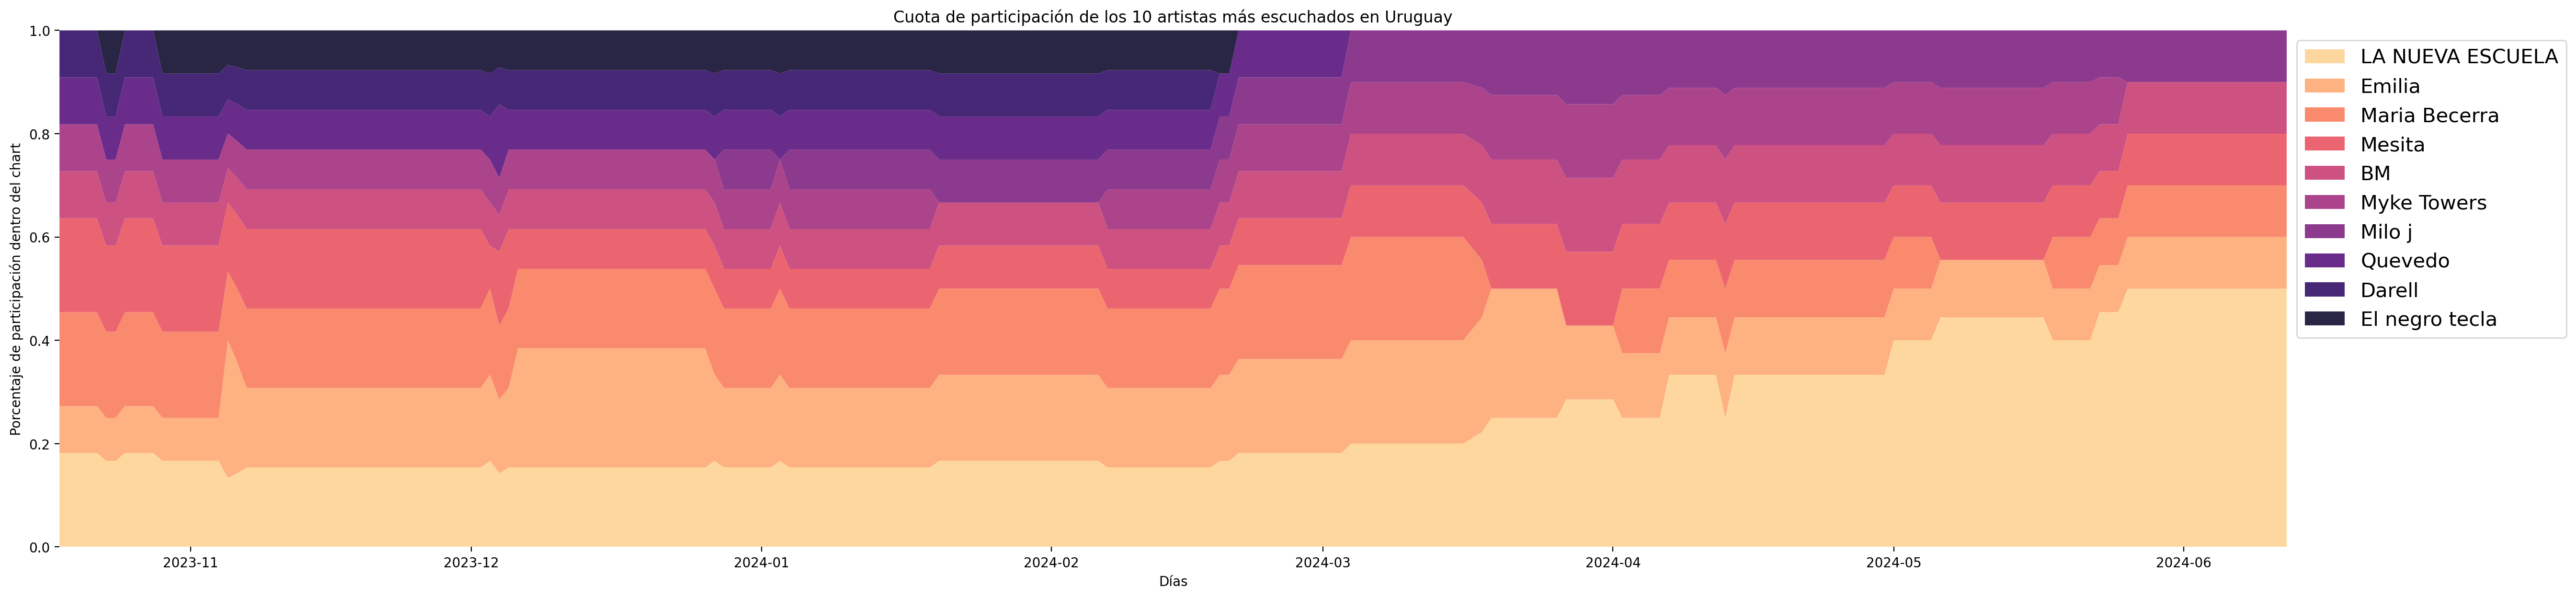

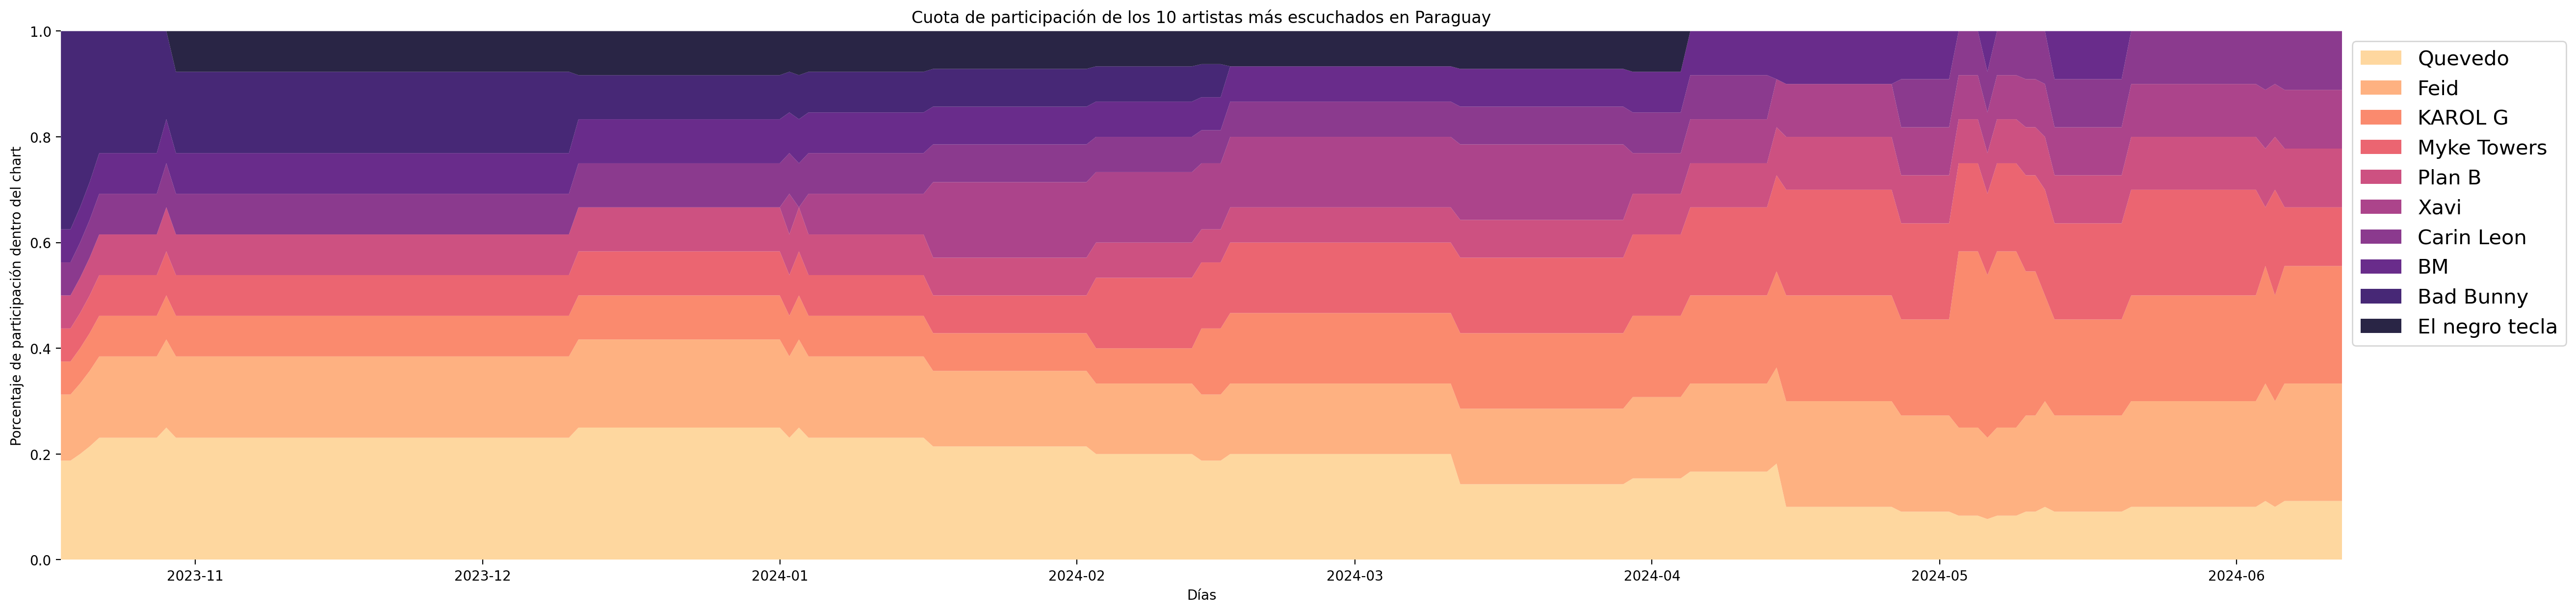

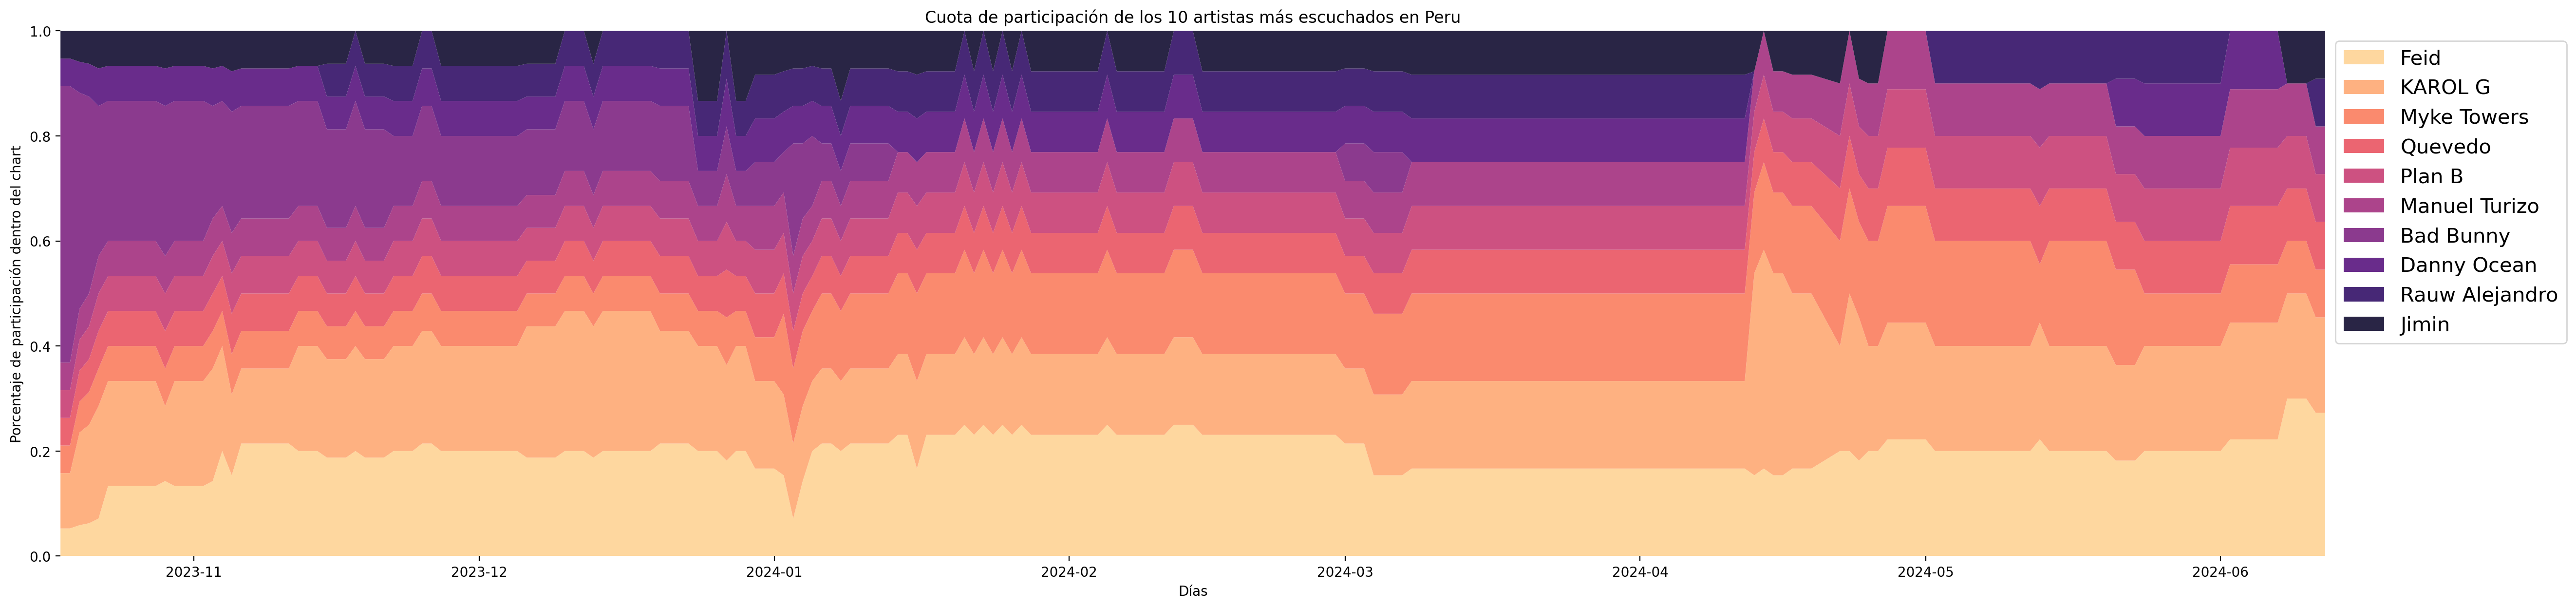

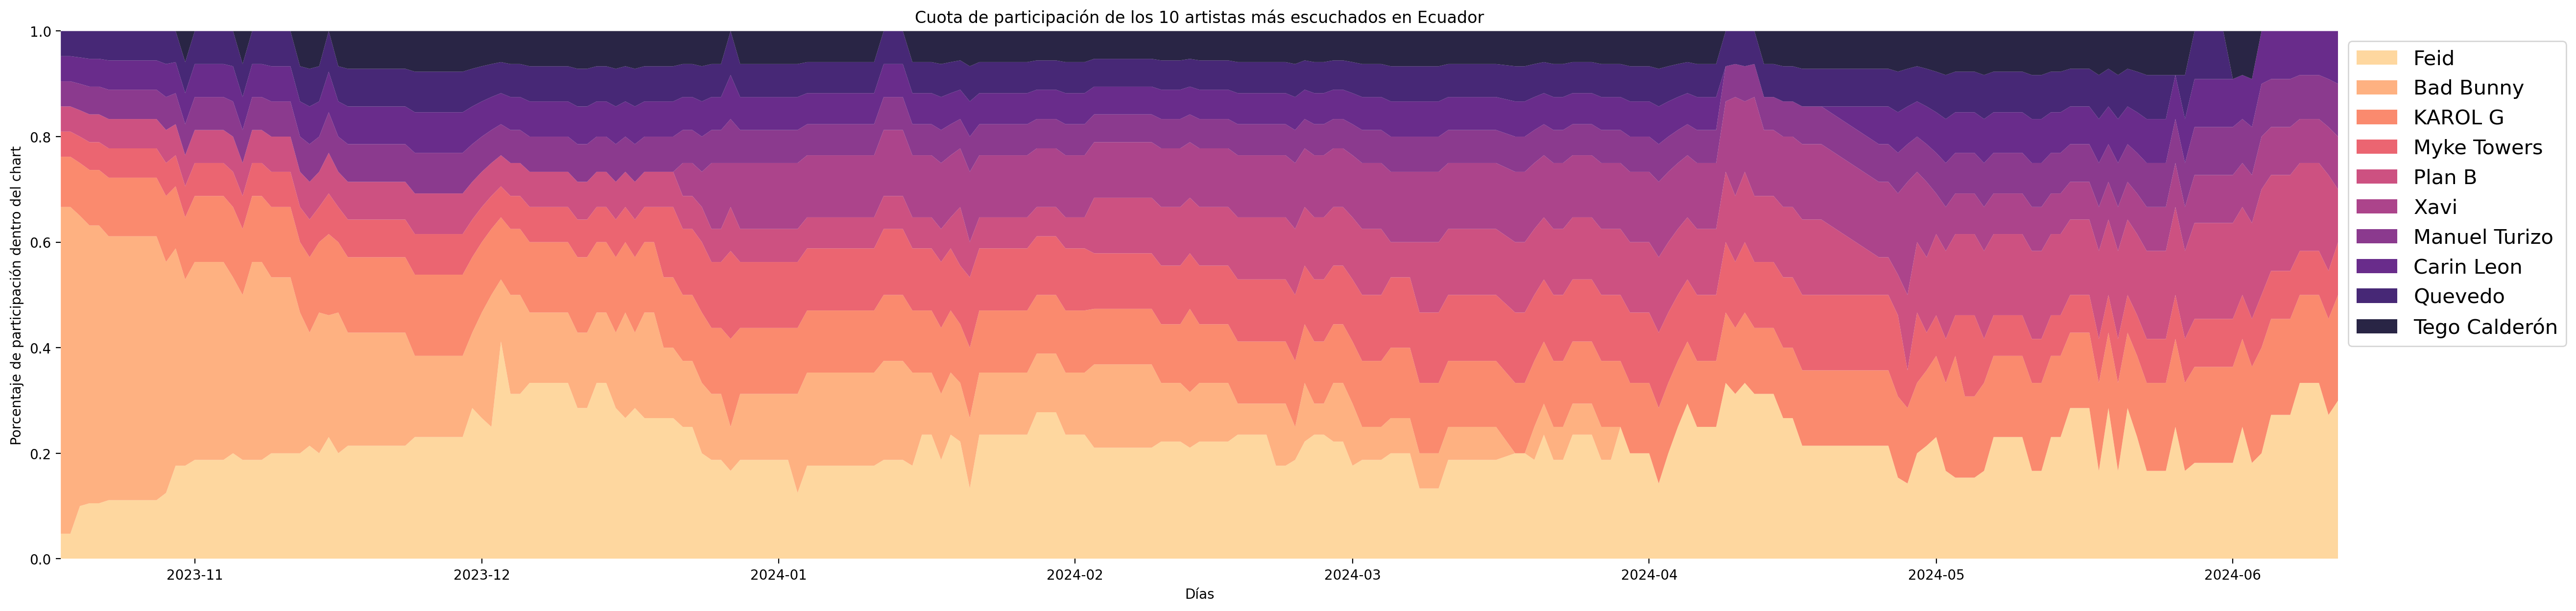

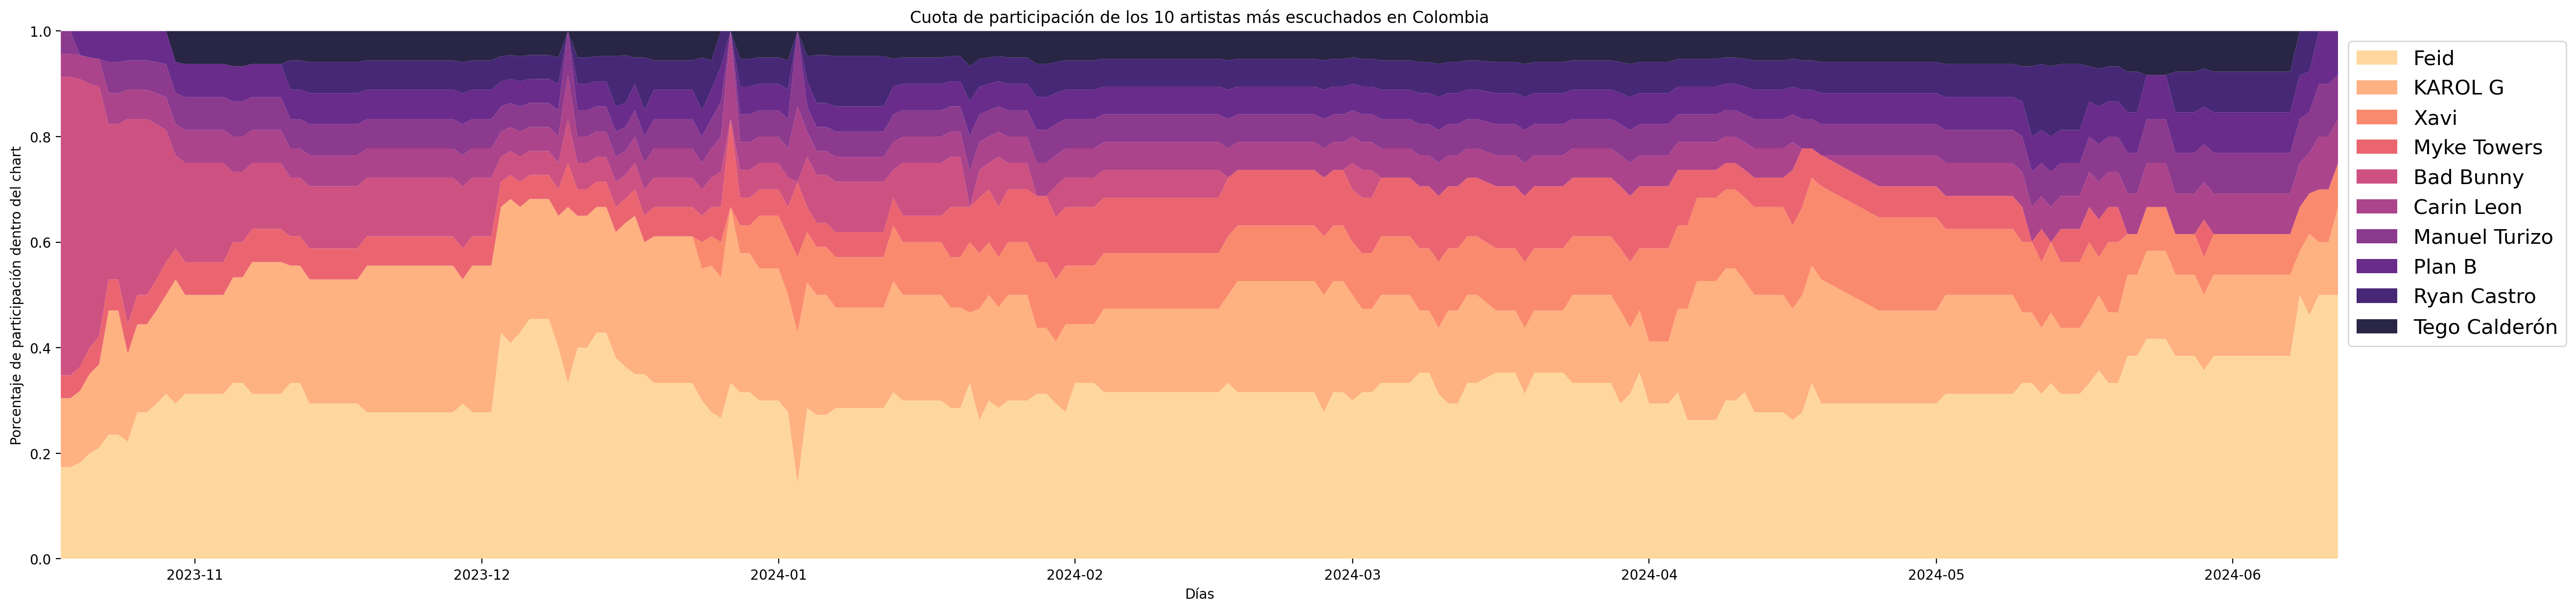

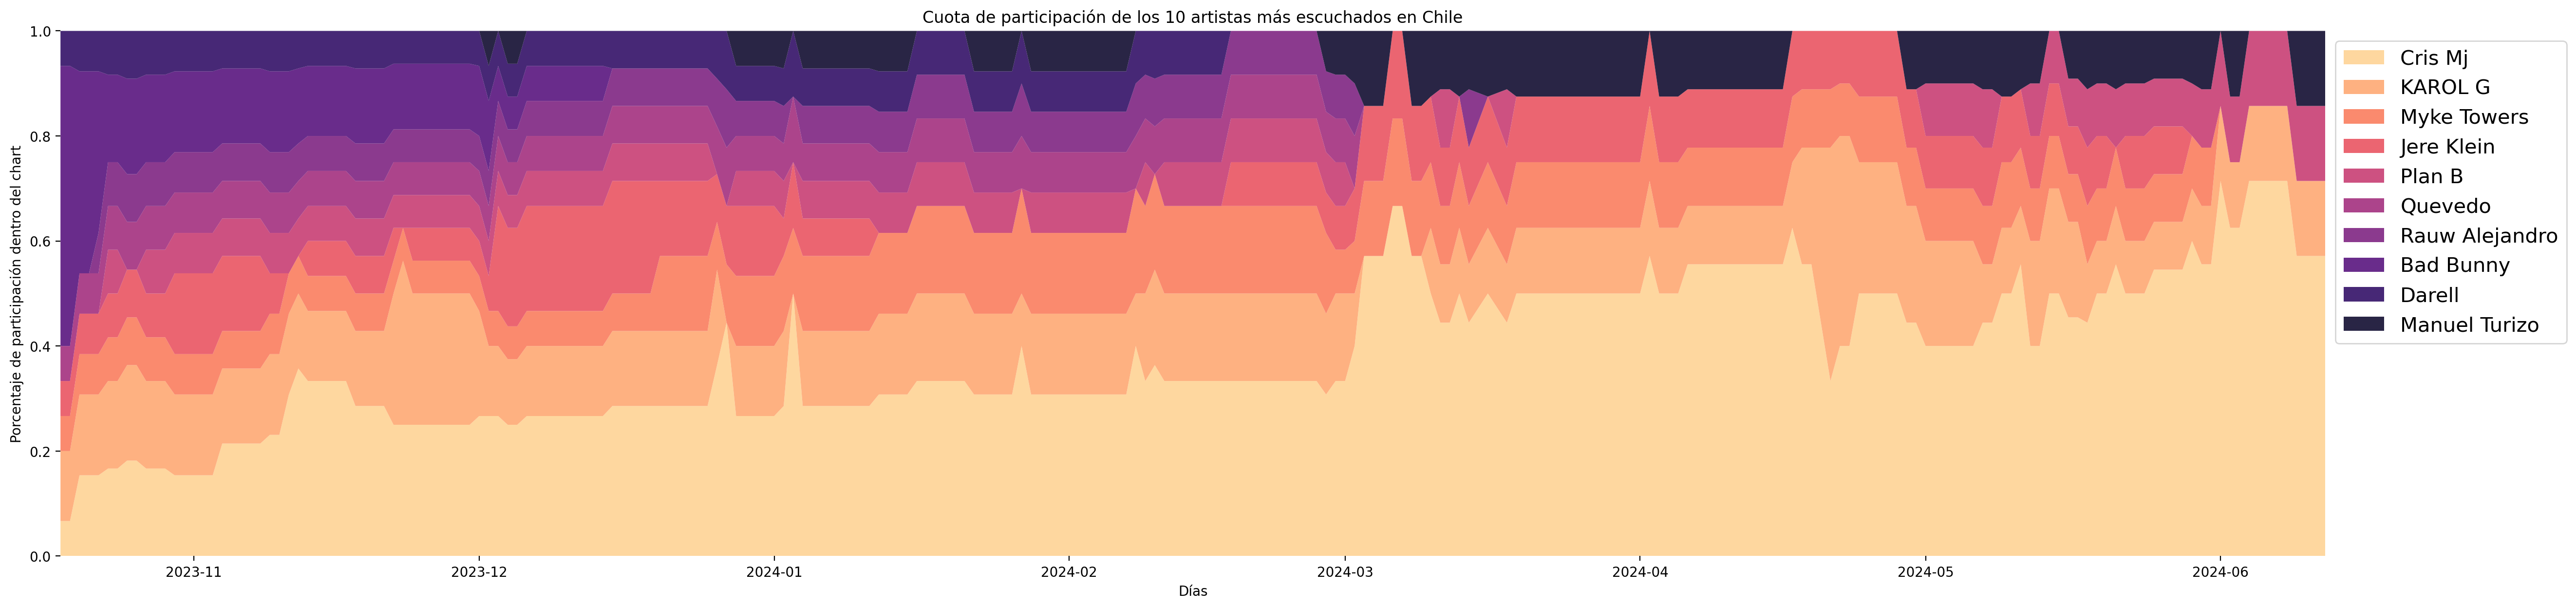

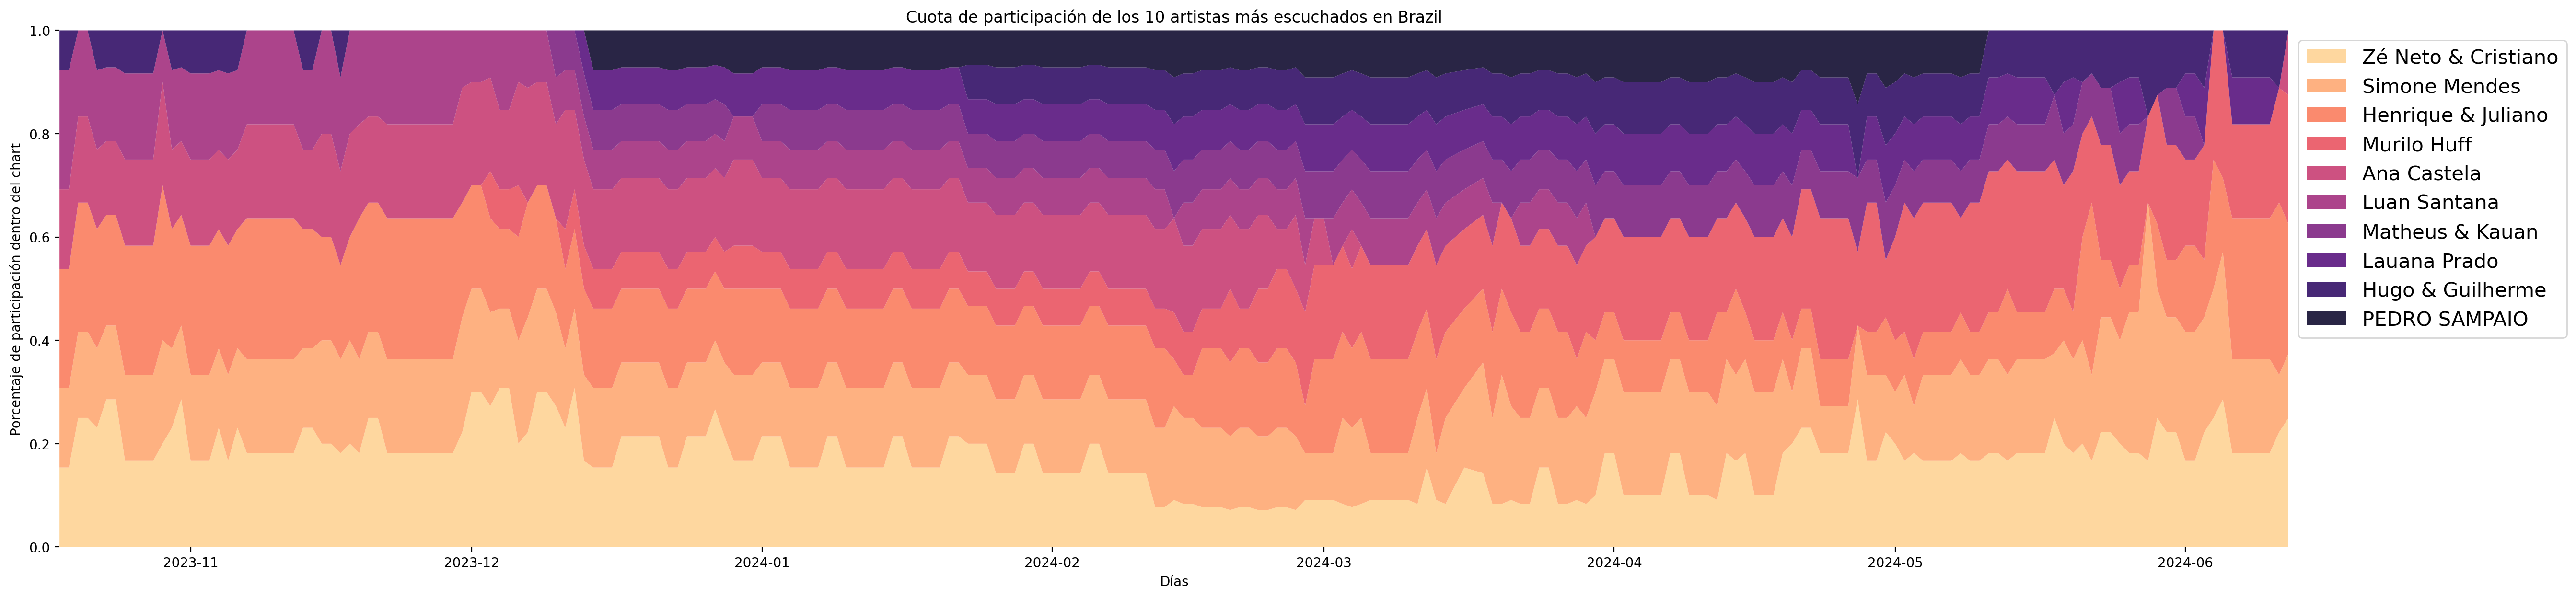

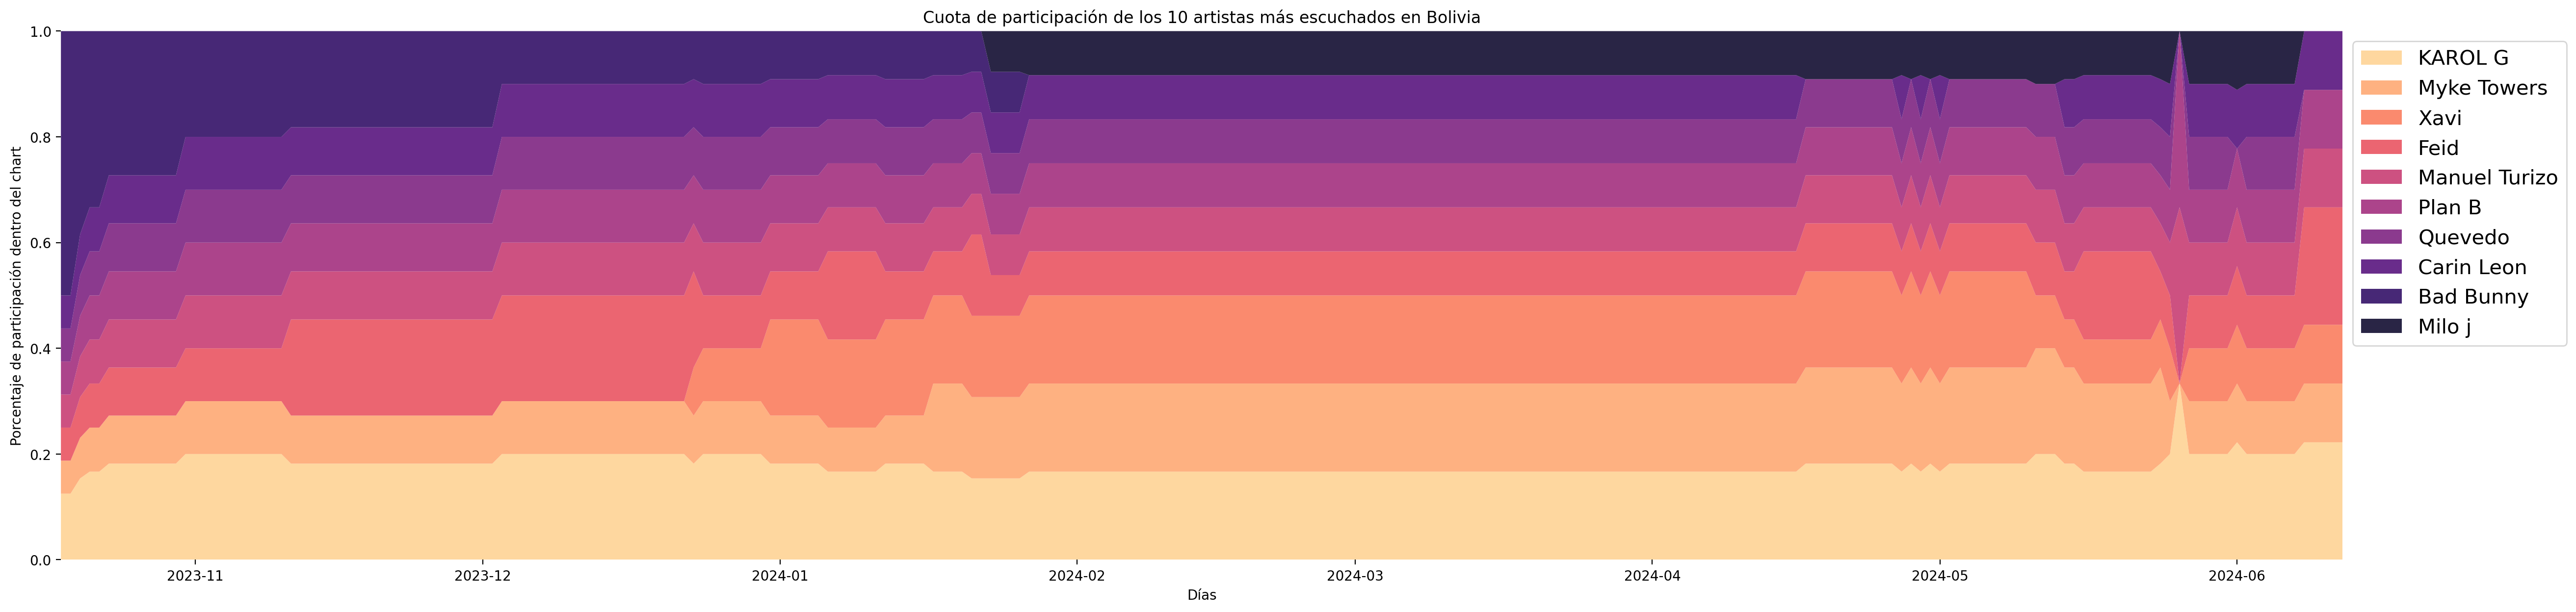

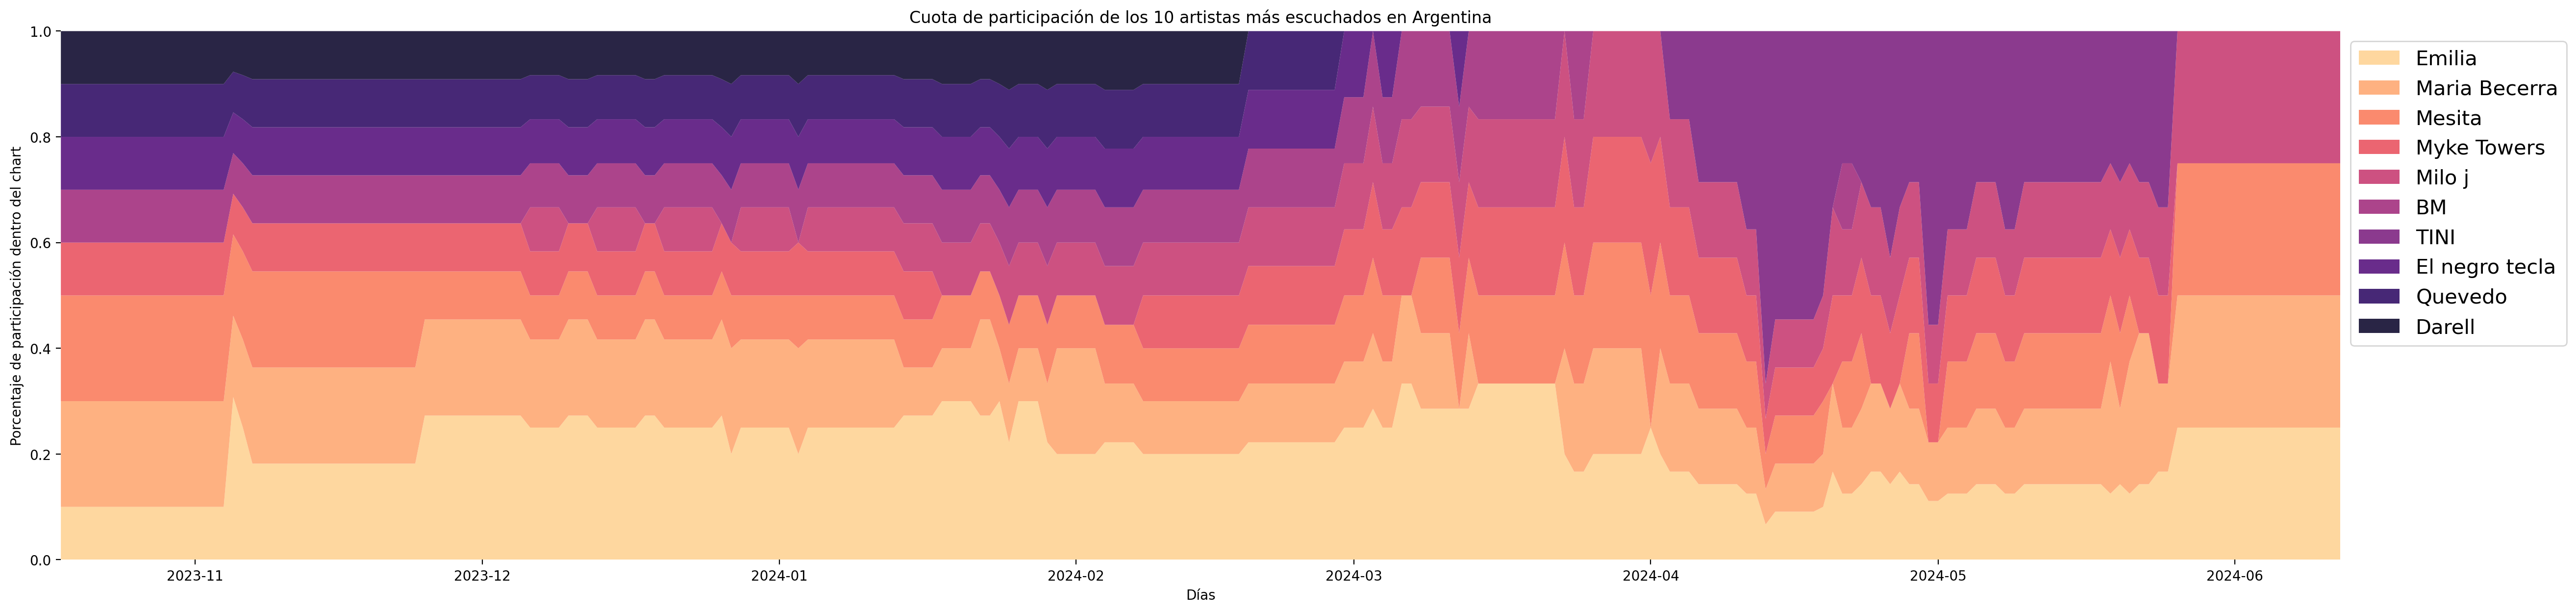

In [31]:
#Listando los países sudamericanos
countries = datos_sudamerica["country_name"].unique().tolist()
for c in countries:
    country = datos_sudamerica[datos_sudamerica["country_name"] == c]

    auxiliar_i = pd.pivot_table(country, values= "name", index= "snapshot_date", columns= "artists", aggfunc= "count", fill_value= 0)

    auxiliar_i["total"] = auxiliar_i.sum(axis=1)
    #------------------------------------------
    #Eliminando los features
    no_features = country[country['artists'].str.contains(',') == False]

    auxiliar_ii = pd.pivot_table(no_features, values= "name", index= "artists", columns= "snapshot_date", aggfunc= "count", fill_value= 0)
    auxiliar_ii["total"] = auxiliar_ii.sum(axis=1)

    #-------------------------------------------
    #Normalizando el database a trabajar
    order = auxiliar_ii.sort_values(by="total", ascending=False)

    top_artists = order.head(10)

    popular_data = auxiliar_i[top_artists.index]

    popular_data_normalized = popular_data.div(popular_data.sum(axis=1), axis=0)

    popular_data_normalized.index = pd.to_datetime(popular_data_normalized.index)
    #---------------------------------------------

    #Definiendo la paleta de colores
    artists_colors = sns.color_palette("magma", 10)[::-1]
    color_asing = {name: artists_colors[i] for i, name in enumerate(top_artists.index)}

    #----------------------------------------------
    #Generando gráfico
    fig, ax = plt.subplots(figsize=(30, 7))


    #Configuración de límites y etiquetas
    ax.set_xlim([pd.to_datetime("2023-10-18"), pd.to_datetime("2024-06-12")])
    ax.set_ylim([0, 1])
    ax.set_title(f"Cuota de participación de los 10 artistas más escuchados en {c}", loc="center")
    ax.set_ylabel("Porcentaje de participación dentro del chart")
    ax.set_xlabel("Días")

    #Preparación de datos para stackplot
    stack_data = [popular_data_normalized[nombre].values for nombre in popular_data_normalized.columns]
    stack_colors = [color_asing[nombre] for nombre in popular_data_normalized.columns]


    #Graficando las áreas apiladas con stackplot
    ax.stackplot(popular_data_normalized.index, stack_data, labels=popular_data_normalized.columns, colors=stack_colors, alpha=0.9)

    #Añadiendo etiqueta
    ax.legend(loc='upper left', bbox_to_anchor=(1, 1), fancybox=True, fontsize=15)

    #Eliminando las espinas del gráfico
    sns.despine(ax=ax, bottom=True, top=True, left=True, right=True)

    plt.show()